<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-settings" data-toc-modified-id="Importing-Libraries-and-settings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries and settings</a></span></li></ul></li><li><span><a href="#EDA,-Data-cleaning-&amp;-Analysis-of-missing-values-continued..." data-toc-modified-id="EDA,-Data-cleaning-&amp;-Analysis-of-missing-values-continued...-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA, Data cleaning &amp; Analysis of missing values continued...</a></span><ul class="toc-item"><li><span><a href="#Reading-the-dataset--&amp;-basic-data-cleaning" data-toc-modified-id="Reading-the-dataset--&amp;-basic-data-cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading the dataset  &amp; basic data cleaning</a></span></li><li><span><a href="#Removing-columns-where-missing-values-is->-40%" data-toc-modified-id="Removing-columns-where-missing-values-is->-40%-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing columns where missing values is &gt; 40%</a></span></li><li><span><a href="#Exploring-PM2.5" data-toc-modified-id="Exploring-PM2.5-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring PM2.5</a></span><ul class="toc-item"><li><span><a href="#2015---PM2.5" data-toc-modified-id="2015---PM2.5-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>2015 - PM2.5</a></span></li><li><span><a href="#PM2.5---2016" data-toc-modified-id="PM2.5---2016-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>PM2.5 - 2016</a></span><ul class="toc-item"><li><span><a href="#Total-data-points-in-the-graph" data-toc-modified-id="Total-data-points-in-the-graph-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Total data points in the graph</a></span></li></ul></li><li><span><a href="#PM2.5---2022" data-toc-modified-id="PM2.5---2022-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>PM2.5 - 2022</a></span></li><li><span><a href="#PM2.5---2023" data-toc-modified-id="PM2.5---2023-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>PM2.5 - 2023</a></span></li></ul></li><li><span><a href="#POC---Filling-NA-using-bfill-method-on-Feb-28-2023" data-toc-modified-id="POC---Filling-NA-using-bfill-method-on-Feb-28-2023-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>POC - Filling NA using bfill method on Feb 28 2023</a></span></li></ul></li><li><span><a href="#End-of-part-2---To-be-continued....." data-toc-modified-id="End-of-part-2---To-be-continued.....-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>End of part 2 - To be continued.....</a></span></li></ul></div>

# Prerequisites

## Importing Libraries and settings

In [3]:
# For data cleaning and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 
import datetime

# To print multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plot settings
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

# Set default font sizes
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 20 # Title
mpl.rcParams['axes.titleweight'] = 'bold' # Make title bold 
mpl.rcParams['axes.labelsize'] = 16 # X-Axis & Y-Axis
mpl.rcParams['axes.labelweight'] = 'bold' # Make labels bold
mpl.rcParams['xtick.labelsize'] = 14 # X-ticks
mpl.rcParams['ytick.labelsize'] = 14 # Y-ticks

# Use Plotly color palette
plotly_color_scale = px.colors.qualitative.Plotly
custom_colors = plotly_color_scale

# EDA, Data cleaning & Analysis of missing values continued...

## Reading the dataset  & basic data cleaning

In [4]:
compiled = pd.read_csv('../../data/preprocessing_data/compiled_part_1_end.csv')
compiled

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_8450/4119341689.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  compiled = pd.read_csv('../../data/preprocessing_data/compiled_part_1_end.csv')


Unnamed: 0             Datetime      Station  PM2.5      NO    NO2  \
0                0  2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53   
1                1  2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39   
2                2  2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26   
3                3  2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18   
4                4  2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66   
...            ...                  ...          ...    ...     ...    ...   
147526      147526  2020-06-30 20:00:00   No Station  54.74    6.23  10.67   
147527      147527  2020-06-30 21:00:00   No Station  54.37    6.30  10.28   
147528      147528  2020-06-30 22:00:00   No Station  50.34    6.93  10.36   
147529      147529  2020-06-30 23:00:00   No Station  53.23    6.64  10.30   
147530      147530  2020-07-01 00:00:00   No Station  61.64    5.99  10.58   

           NOx    SO2    CO  Ozone  ...   NH3  CO2     O3    AQI  AQI_Bucket  \
0       144.62  10.50  3.01   5.08  ...   NaN  NaN    NaN    NaN         NaN   
1       170.94   5.64  5.38   6.15  ...   NaN  NaN    NaN    NaN         NaN   
2       262.69   7.60  1.85  12.72  ...   NaN  NaN    NaN    NaN         NaN   
3       317.53  10.53  1.31  11.46  ...   NaN  NaN    NaN    NaN         NaN   
4       273.25   9.98  0.63   4.76  ...   NaN  NaN    NaN    NaN         NaN   
...        ...    ...   ...    ...  ...   ...  ...    ...    ...         ...   
147526   12.60   4.18  0.60    NaN  ...  2.95  NaN  70.95  154.0    Moderate   
147527   11.88   4.03  1.20    NaN  ...  3.47  NaN  55.13  154.0    Moderate   
147528   13.01   6.17  1.00    NaN  ...  3.76  NaN  42.60  155.0    Moderate   
147529   12.75   6.31  0.86    NaN  ...  3.36  NaN  35.61  156.0    Moderate   
147530   12.37   7.57  1.11    NaN  ...  2.91  NaN  44.14  157.0    Moderate   

        Day  Month  Year  Week  Hour  
0         4      3  2020    10     0  
1         4      3  2020    10     1  
2         4      3  2020    10     2  
3         4      3  2020    10     3  
4         4      3  2020    10     4  
...     ...    ...   ...   ...   ...  
147526   30      6  2020    27    20  
147527   30      6  2020    27    21  
147528   30      6  2020    27    22  
147529   30      6  2020    27    23  
147530    1      7  2020    27     0  

[147531 rows x 37 columns]

In [5]:
compiled.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
compiled['Datetime'] = pd.to_datetime(compiled['Datetime'])

In [7]:
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0      2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1      2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2      2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3      2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4      2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                    ...          ...    ...     ...    ...     ...    ...   
147526 2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527 2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528 2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529 2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530 2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  ...   NH3  CO2     O3    AQI  AQI_Bucket  Day  \
0       3.01   5.08     2.04  ...   NaN  NaN    NaN    NaN         NaN    4   
1       5.38   6.15     2.00  ...   NaN  NaN    NaN    NaN         NaN    4   
2       1.85  12.72     2.02  ...   NaN  NaN    NaN    NaN         NaN    4   
3       1.31  11.46     1.96  ...   NaN  NaN    NaN    NaN         NaN    4   
4       0.63   4.76     2.01  ...   NaN  NaN    NaN    NaN         NaN    4   
...      ...    ...      ...  ...   ...  ...    ...    ...         ...  ...   
147526  0.60    NaN     2.14  ...  2.95  NaN  70.95  154.0    Moderate   30   
147527  1.20    NaN     1.87  ...  3.47  NaN  55.13  154.0    Moderate   30   
147528  1.00    NaN     2.41  ...  3.76  NaN  42.60  155.0    Moderate   30   
147529  0.86    NaN     2.54  ...  3.36  NaN  35.61  156.0    Moderate   30   
147530  1.11    NaN     2.67  ...  2.91  NaN  44.14  157.0    Moderate    1   

        Month  Year  Week  Hour  
0           3  2020    10     0  
1           3  2020    10     1  
2           3  2020    10     2  
3           3  2020    10     3  
4           3  2020    10     4  
...       ...   ...   ...   ...  
147526      6  2020    27    20  
147527      6  2020    27    21  
147528      6  2020    27    22  
147529      6  2020    27    23  
147530      7  2020    27     0  

[147531 rows x 36 columns]

## Removing columns where missing values is > 40%

In [8]:
compiled.drop(['Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'NH3', 'CO2', 'O3'], axis = 1, inplace=True)

In [13]:
compiled.columns

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI', 'AQI_Bucket', 'Day',
       'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

In [11]:
compiled["AQI_Bucket"].value_counts(dropna=False)
compiled["AQI"].value_counts(dropna=False)

NaN             114111
Moderate         10271
Very Poor         8489
Poor              6326
Satisfactory      5552
Severe            2180
Good               602
Name: AQI_Bucket, dtype: int64

NaN      114111
100.0       171
92.0        171
76.0        169
142.0       168
          ...  
747.0         1
728.0         1
581.0         1
640.0         1
580.0         1
Name: AQI, Length: 679, dtype: int64

- We see NaNs in both AQI and AQI_Bucket columns.

## Exploring PM2.5

In [43]:
compiled['PM2.5'].value_counts(dropna=False)

NaN       17257
999.99      137
10.00        88
41.47        73
111.01       52
          ...  
416.20        1
0.43          1
384.25        1
368.83        1
9.92          1
Name: PM2.5, Length: 27317, dtype: int64

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 2020 March to 2023 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

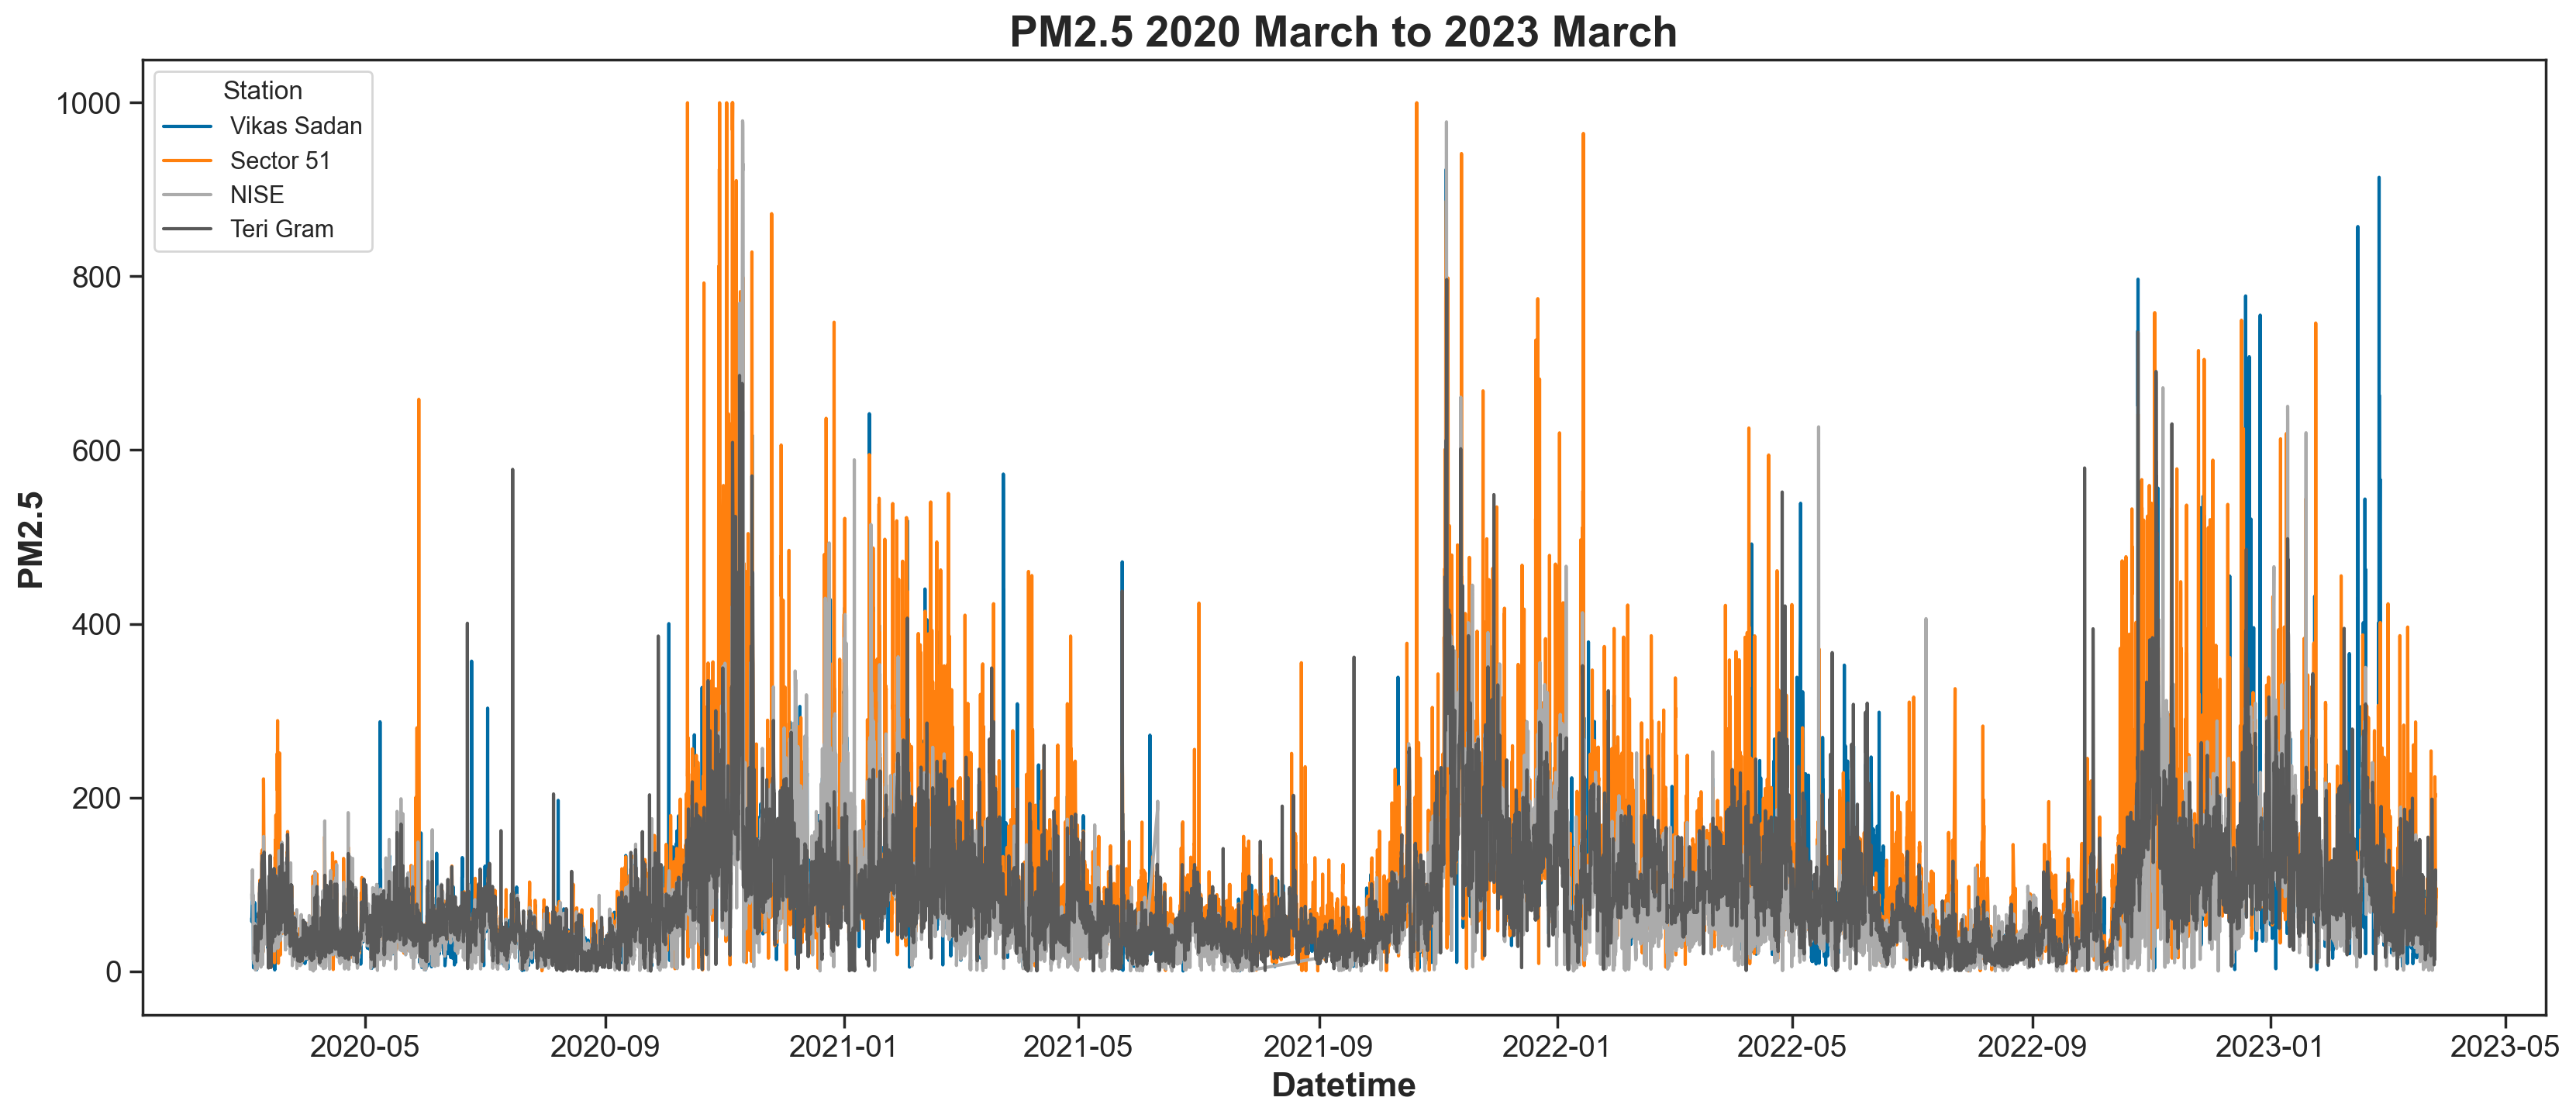

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[:107273], x="Datetime", y="PM2.5", hue="Station")
plt.title("PM2.5 2020 March to 2023 March")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 2015 to 2020 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

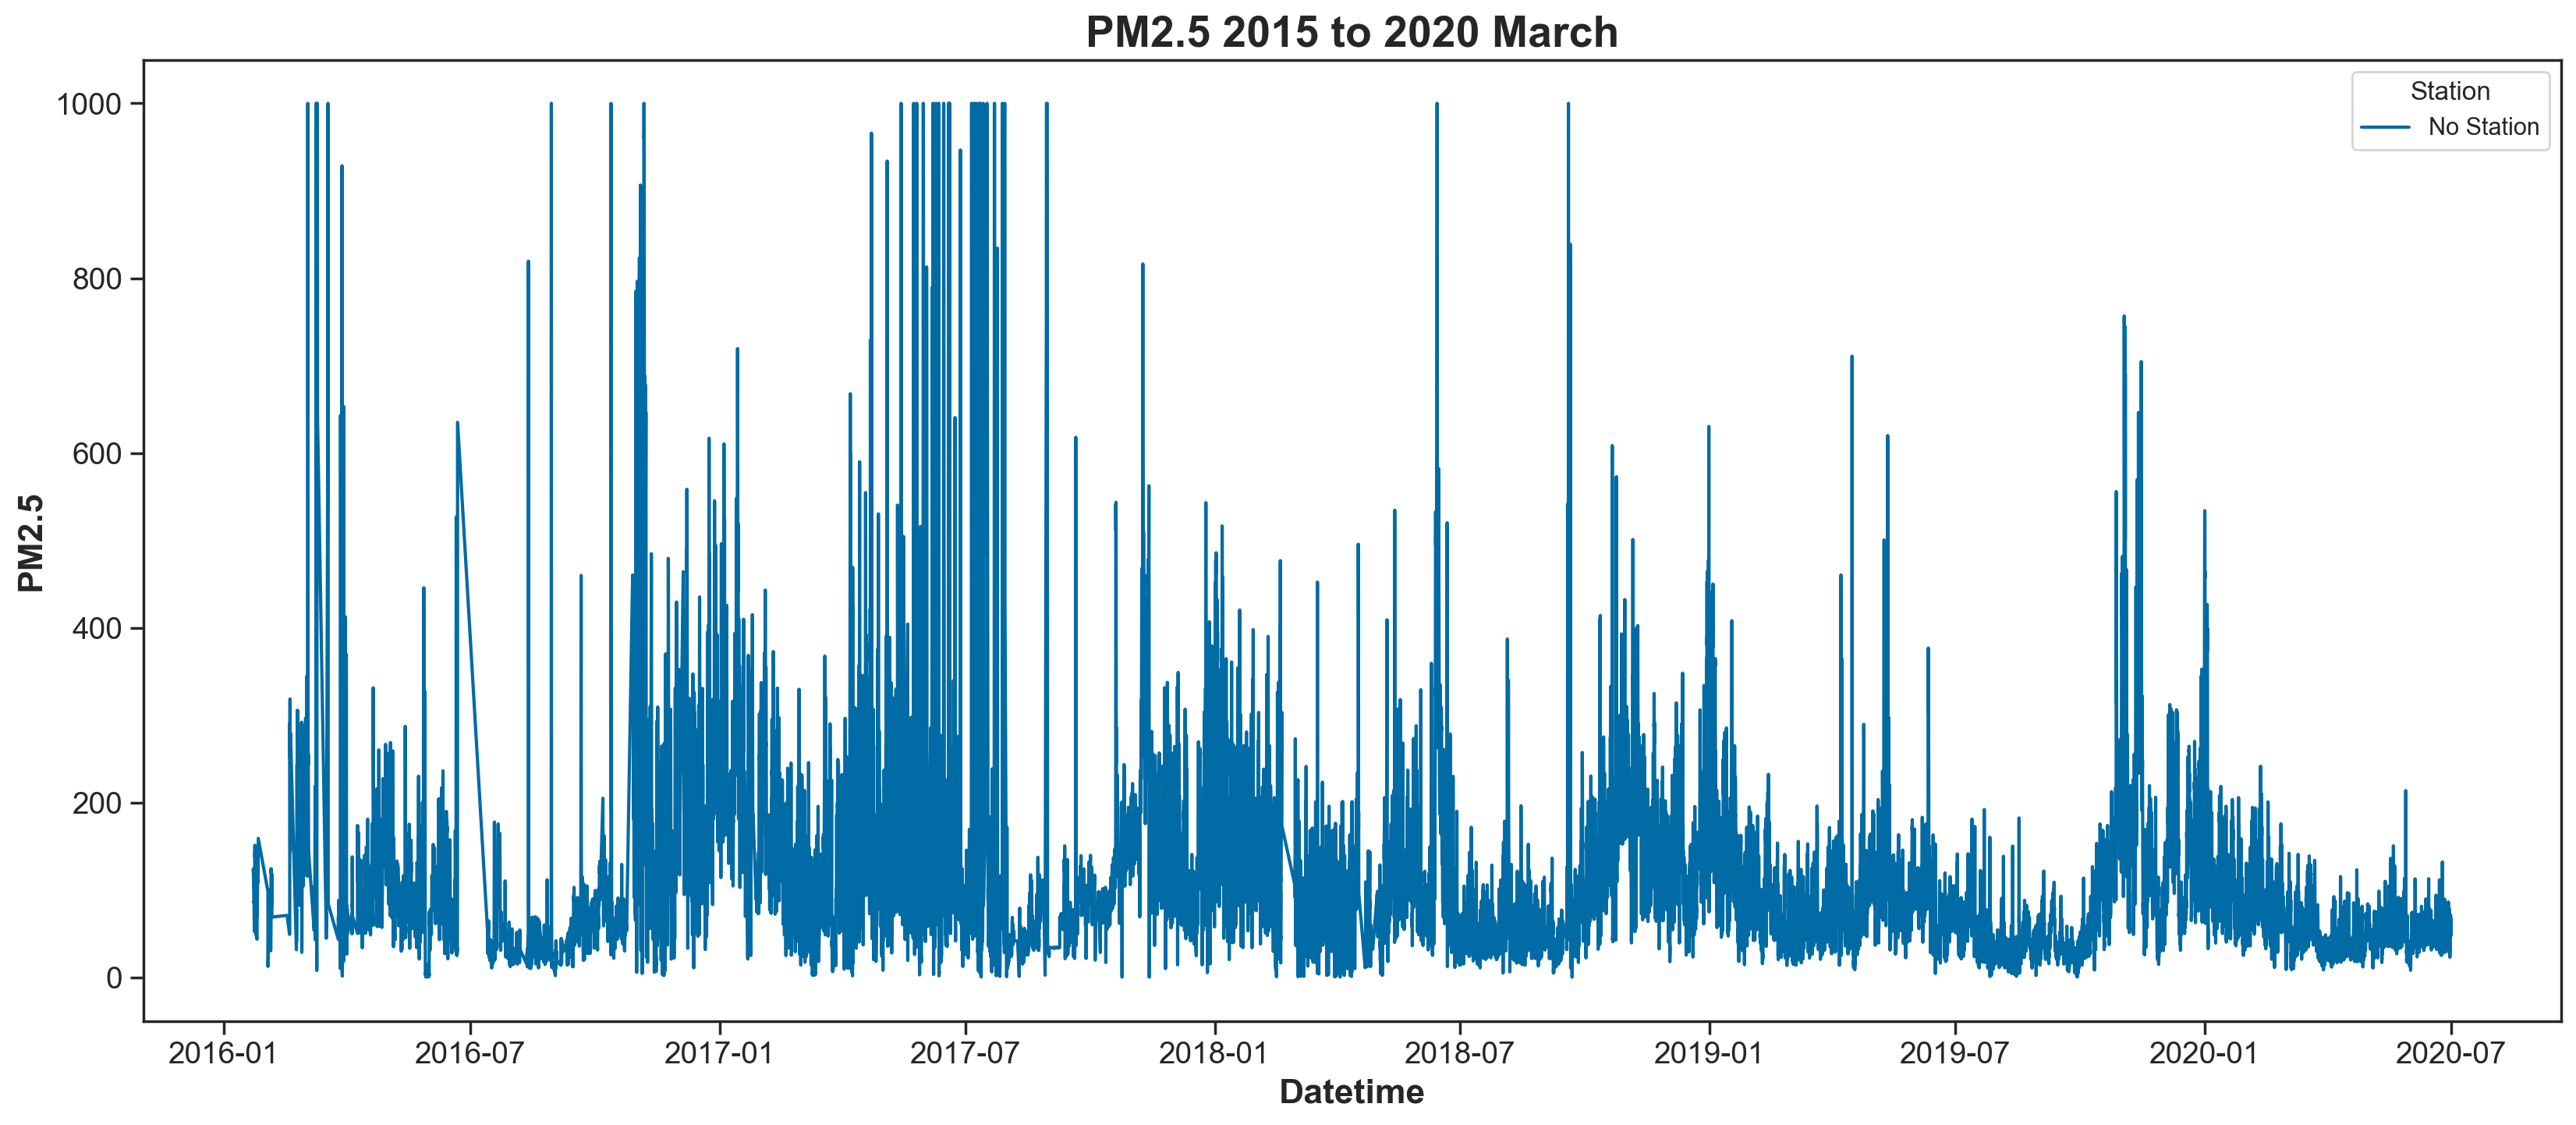

In [17]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[107273:], x="Datetime", y="PM2.5", hue="Station")
plt.title("PM2.5 2015 to 2020 March")
plt.xlabel("Datetime")
plt.ylabel("PM2.5")

0 Vikas Sadan


<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 Vikas Sadan 2020 March to 2023 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

1 Sector 51


<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 Sector 51 2020 March to 2023 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

2 NISE


<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 NISE 2020 March to 2023 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

3 Teri Gram


<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, 'PM2.5 Teri Gram 2020 March to 2023 March')

Text(0.5, 0, 'Datetime')

Text(0, 0.5, 'PM2.5')

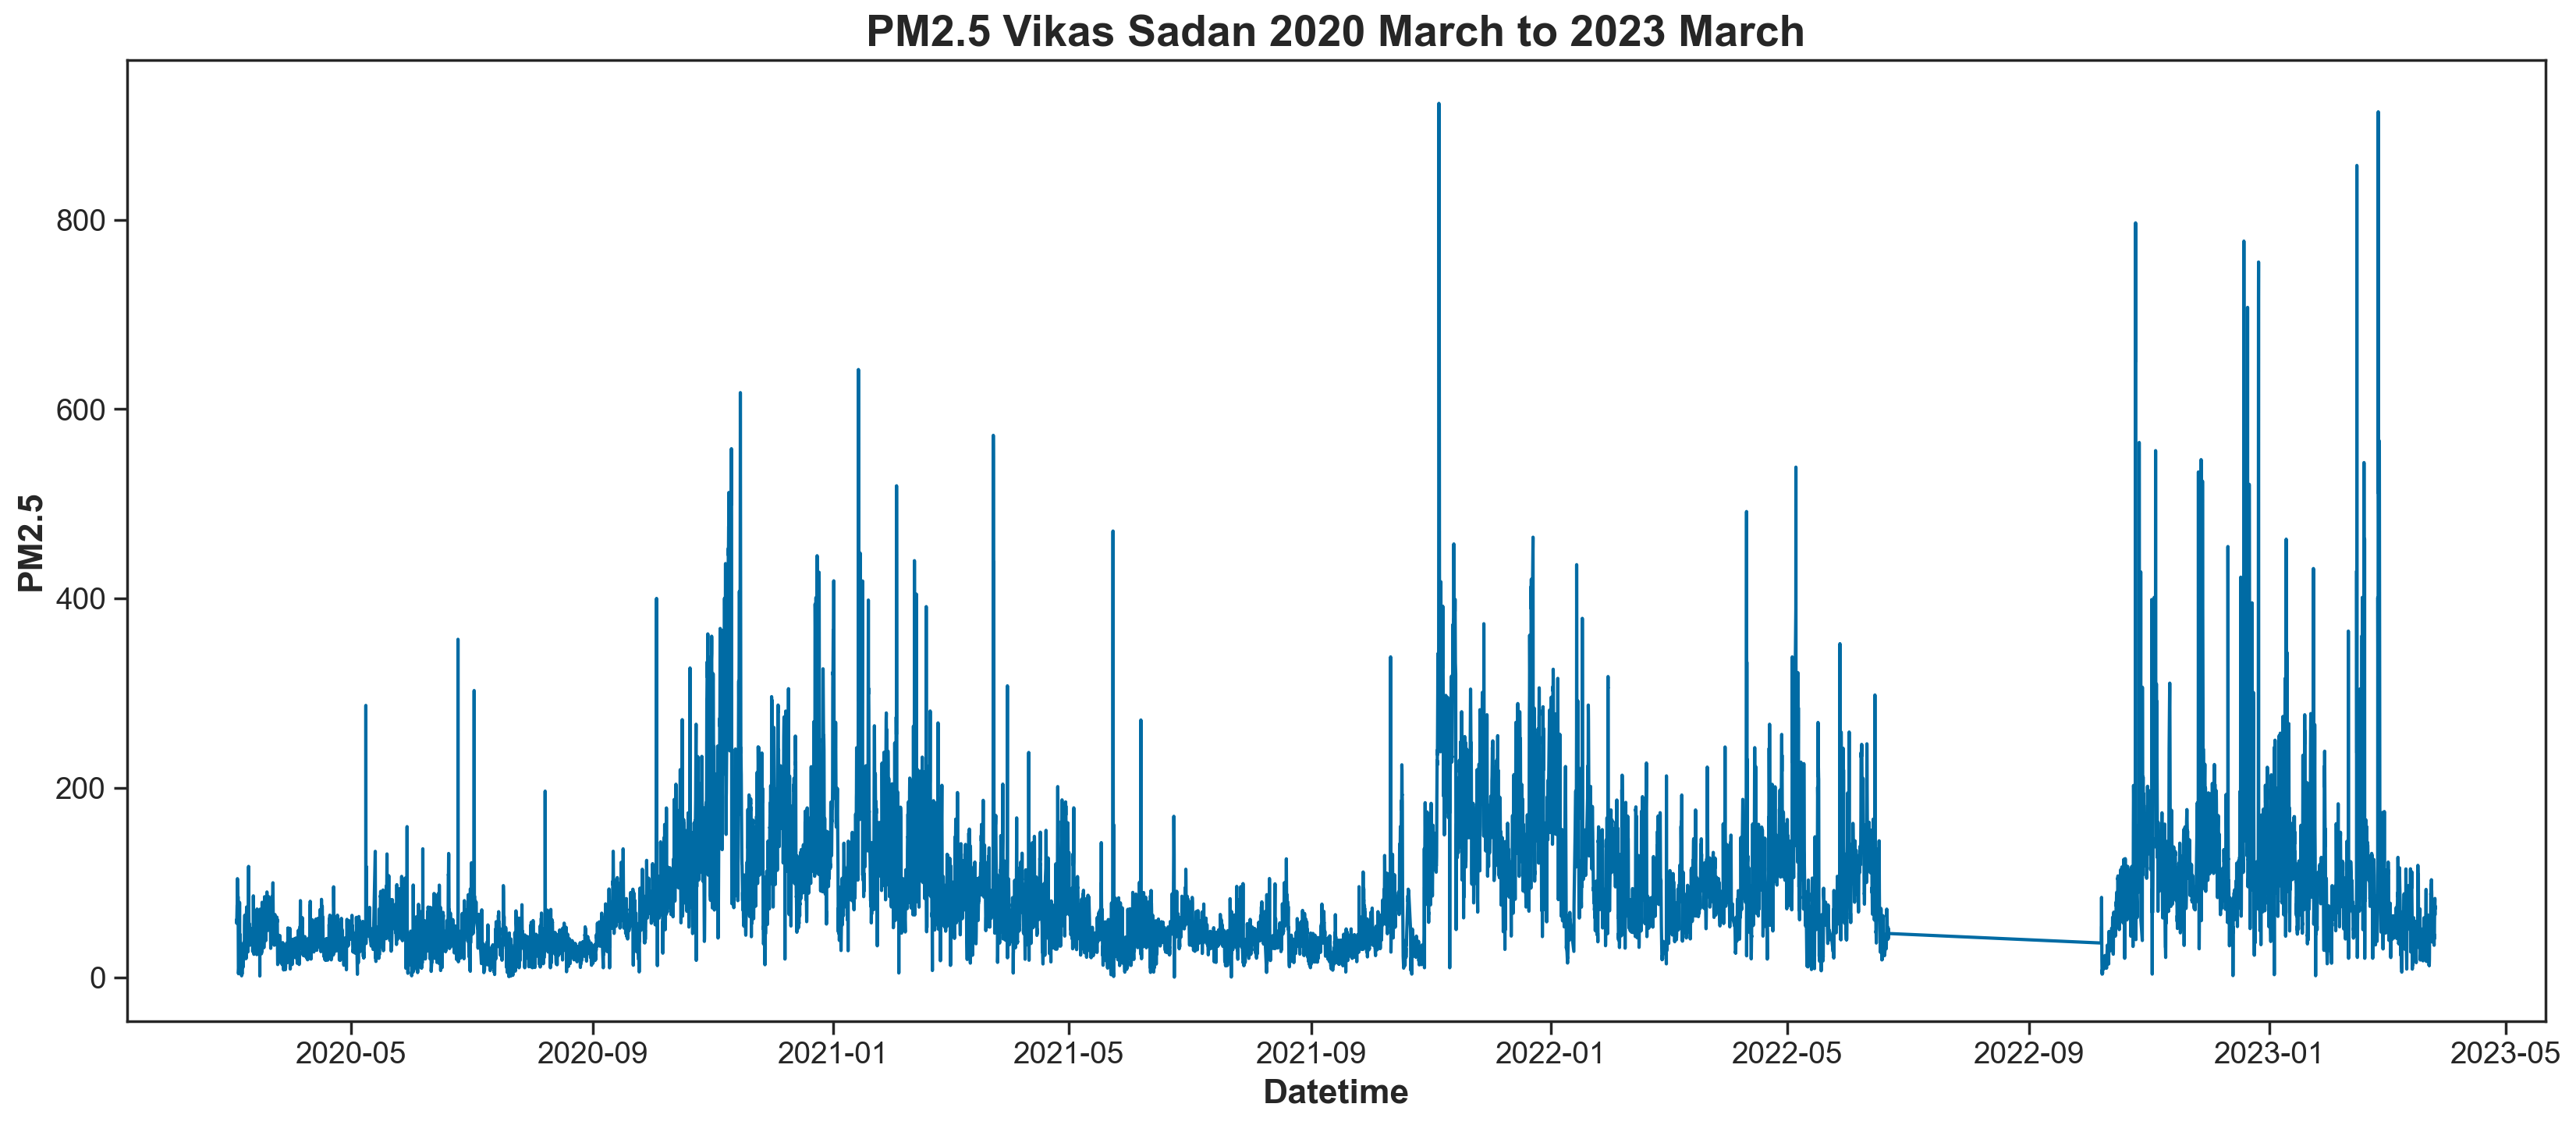

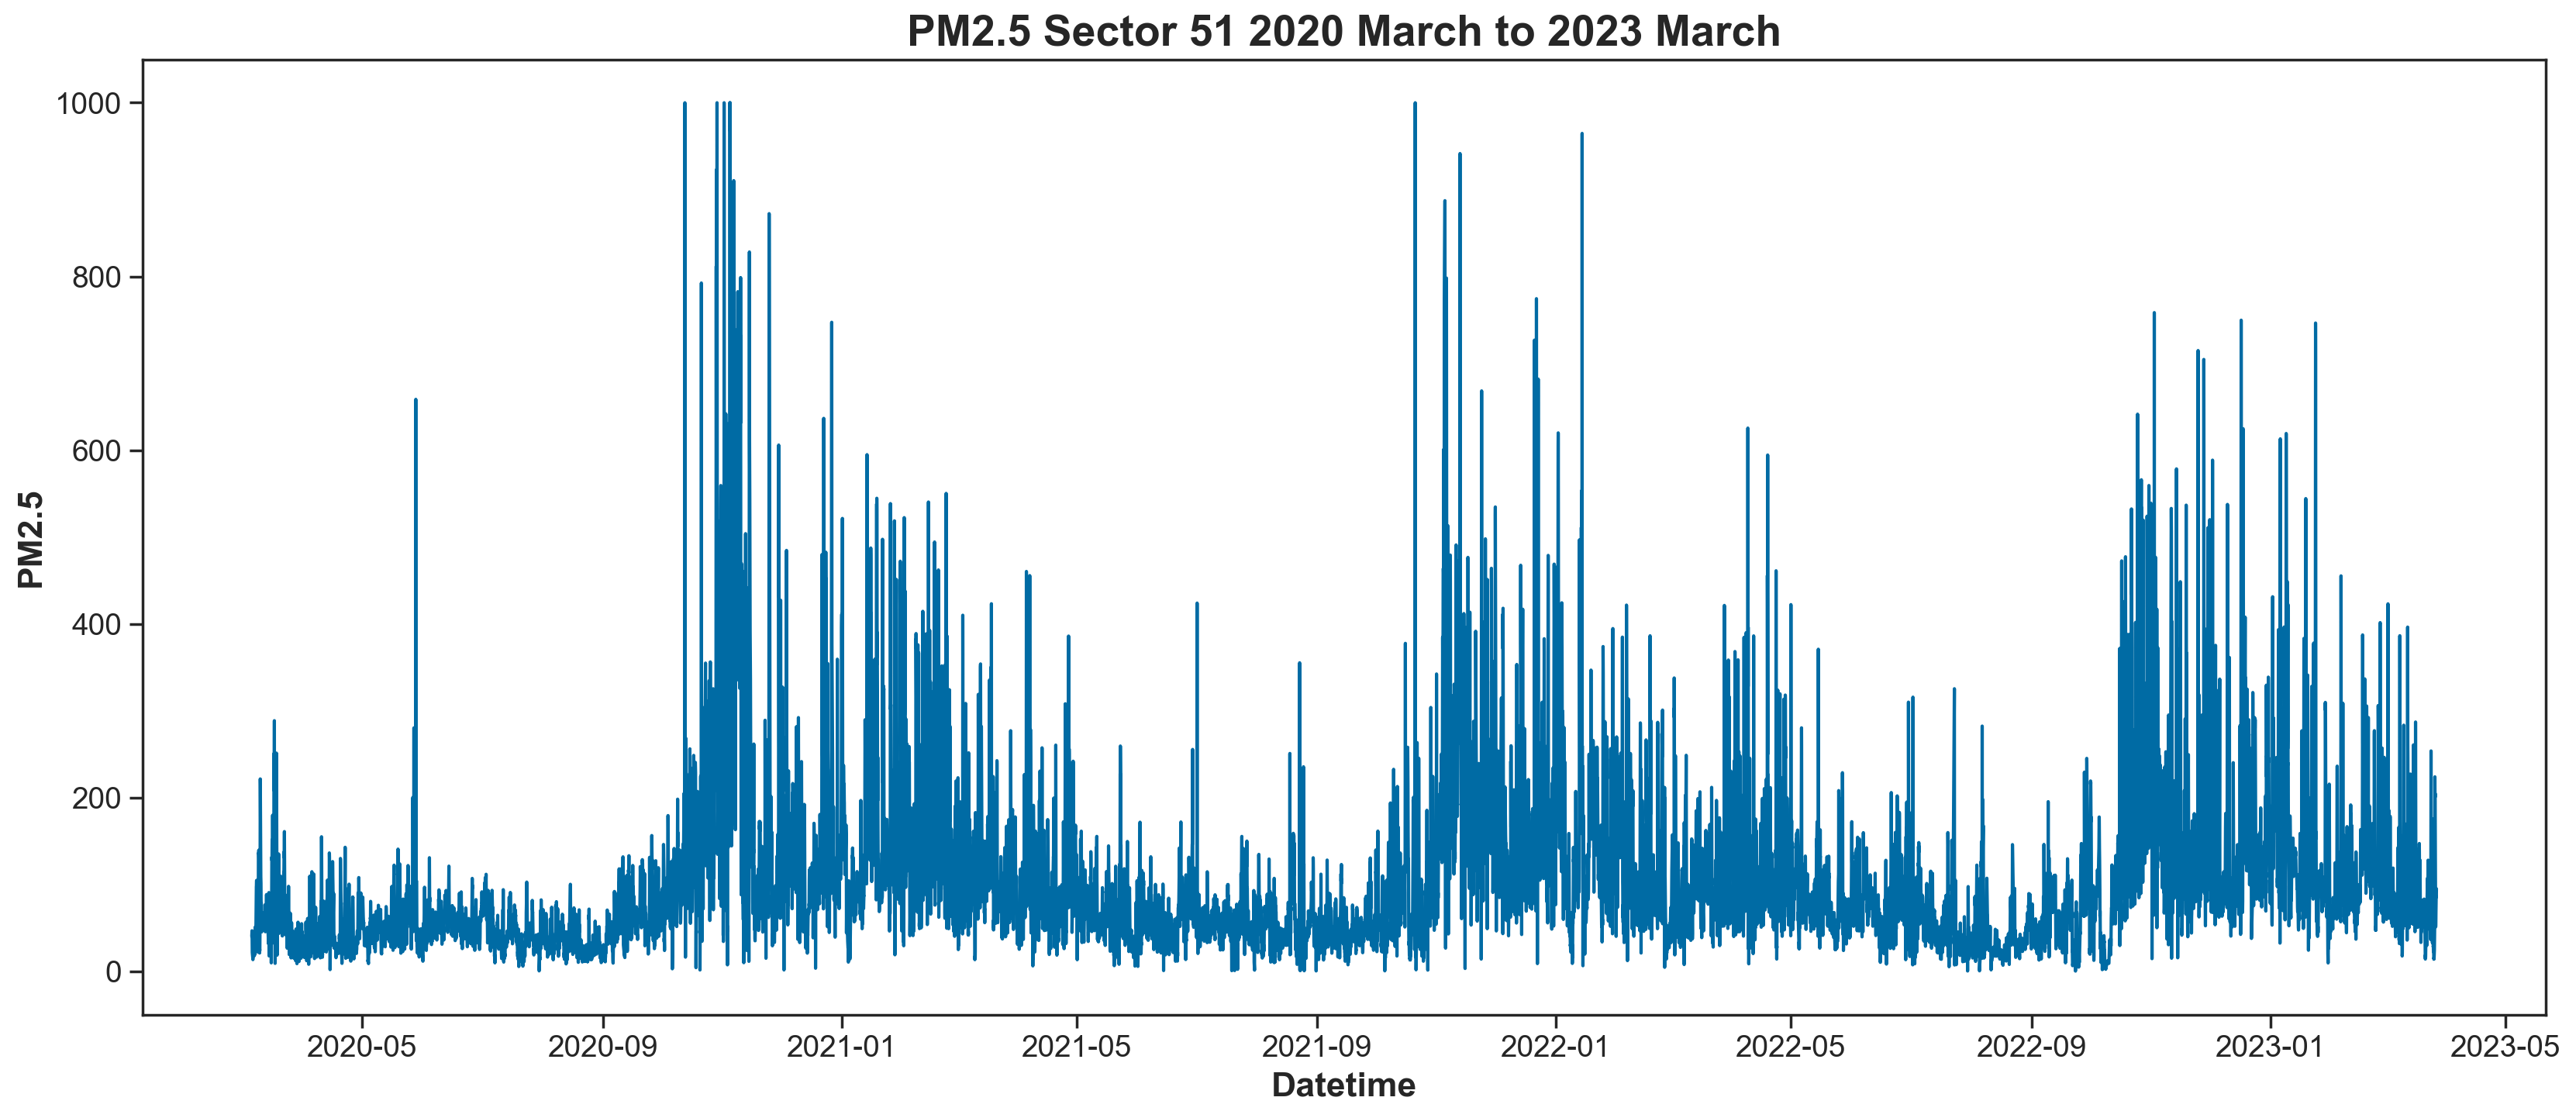

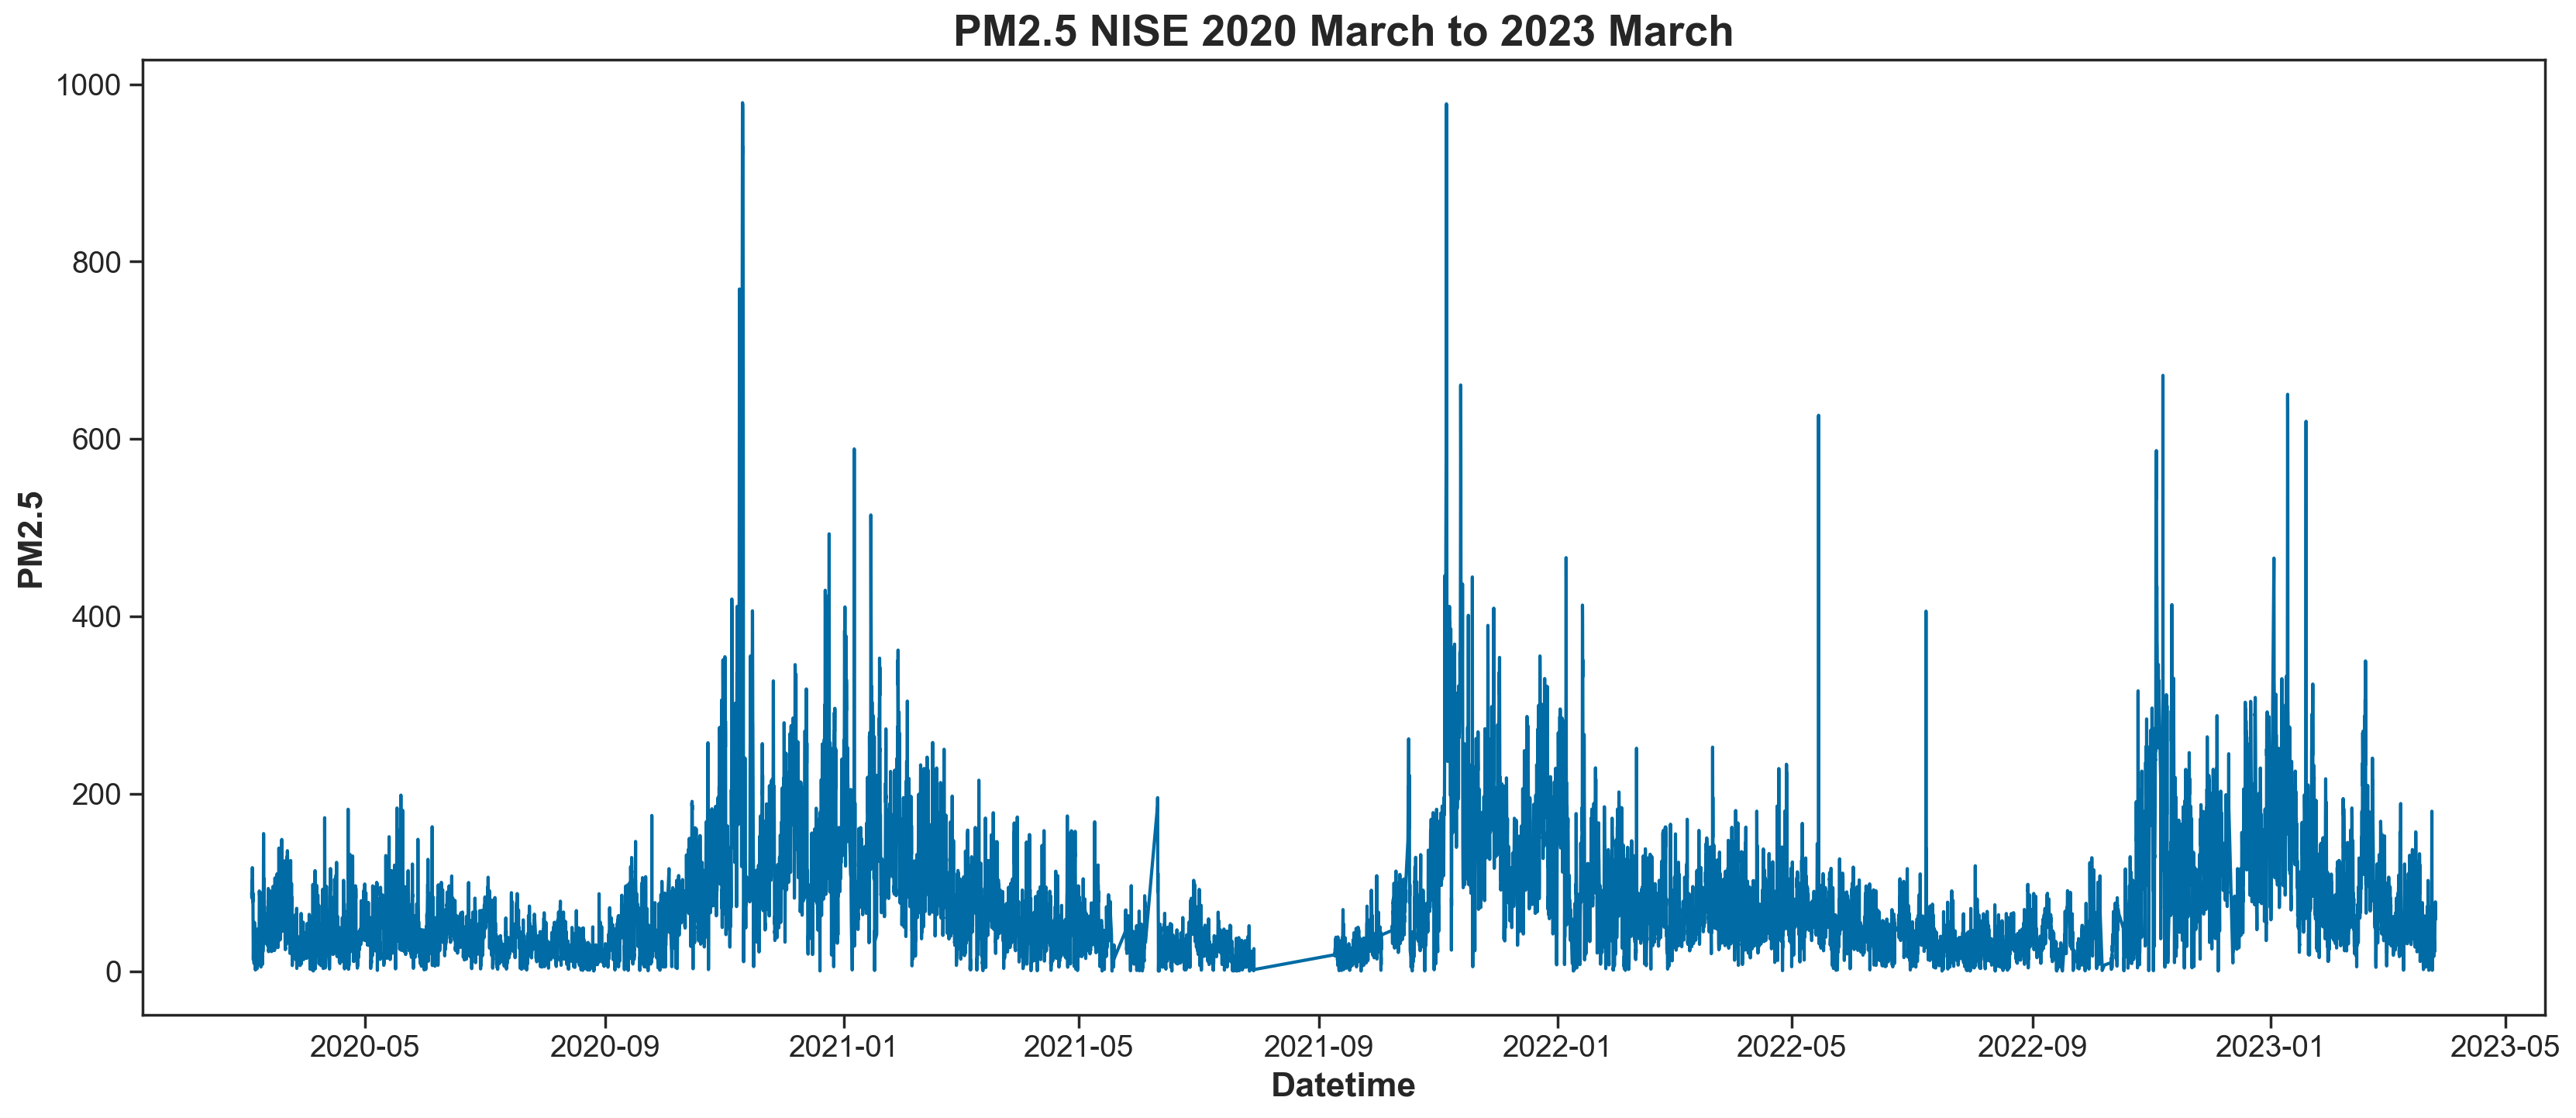

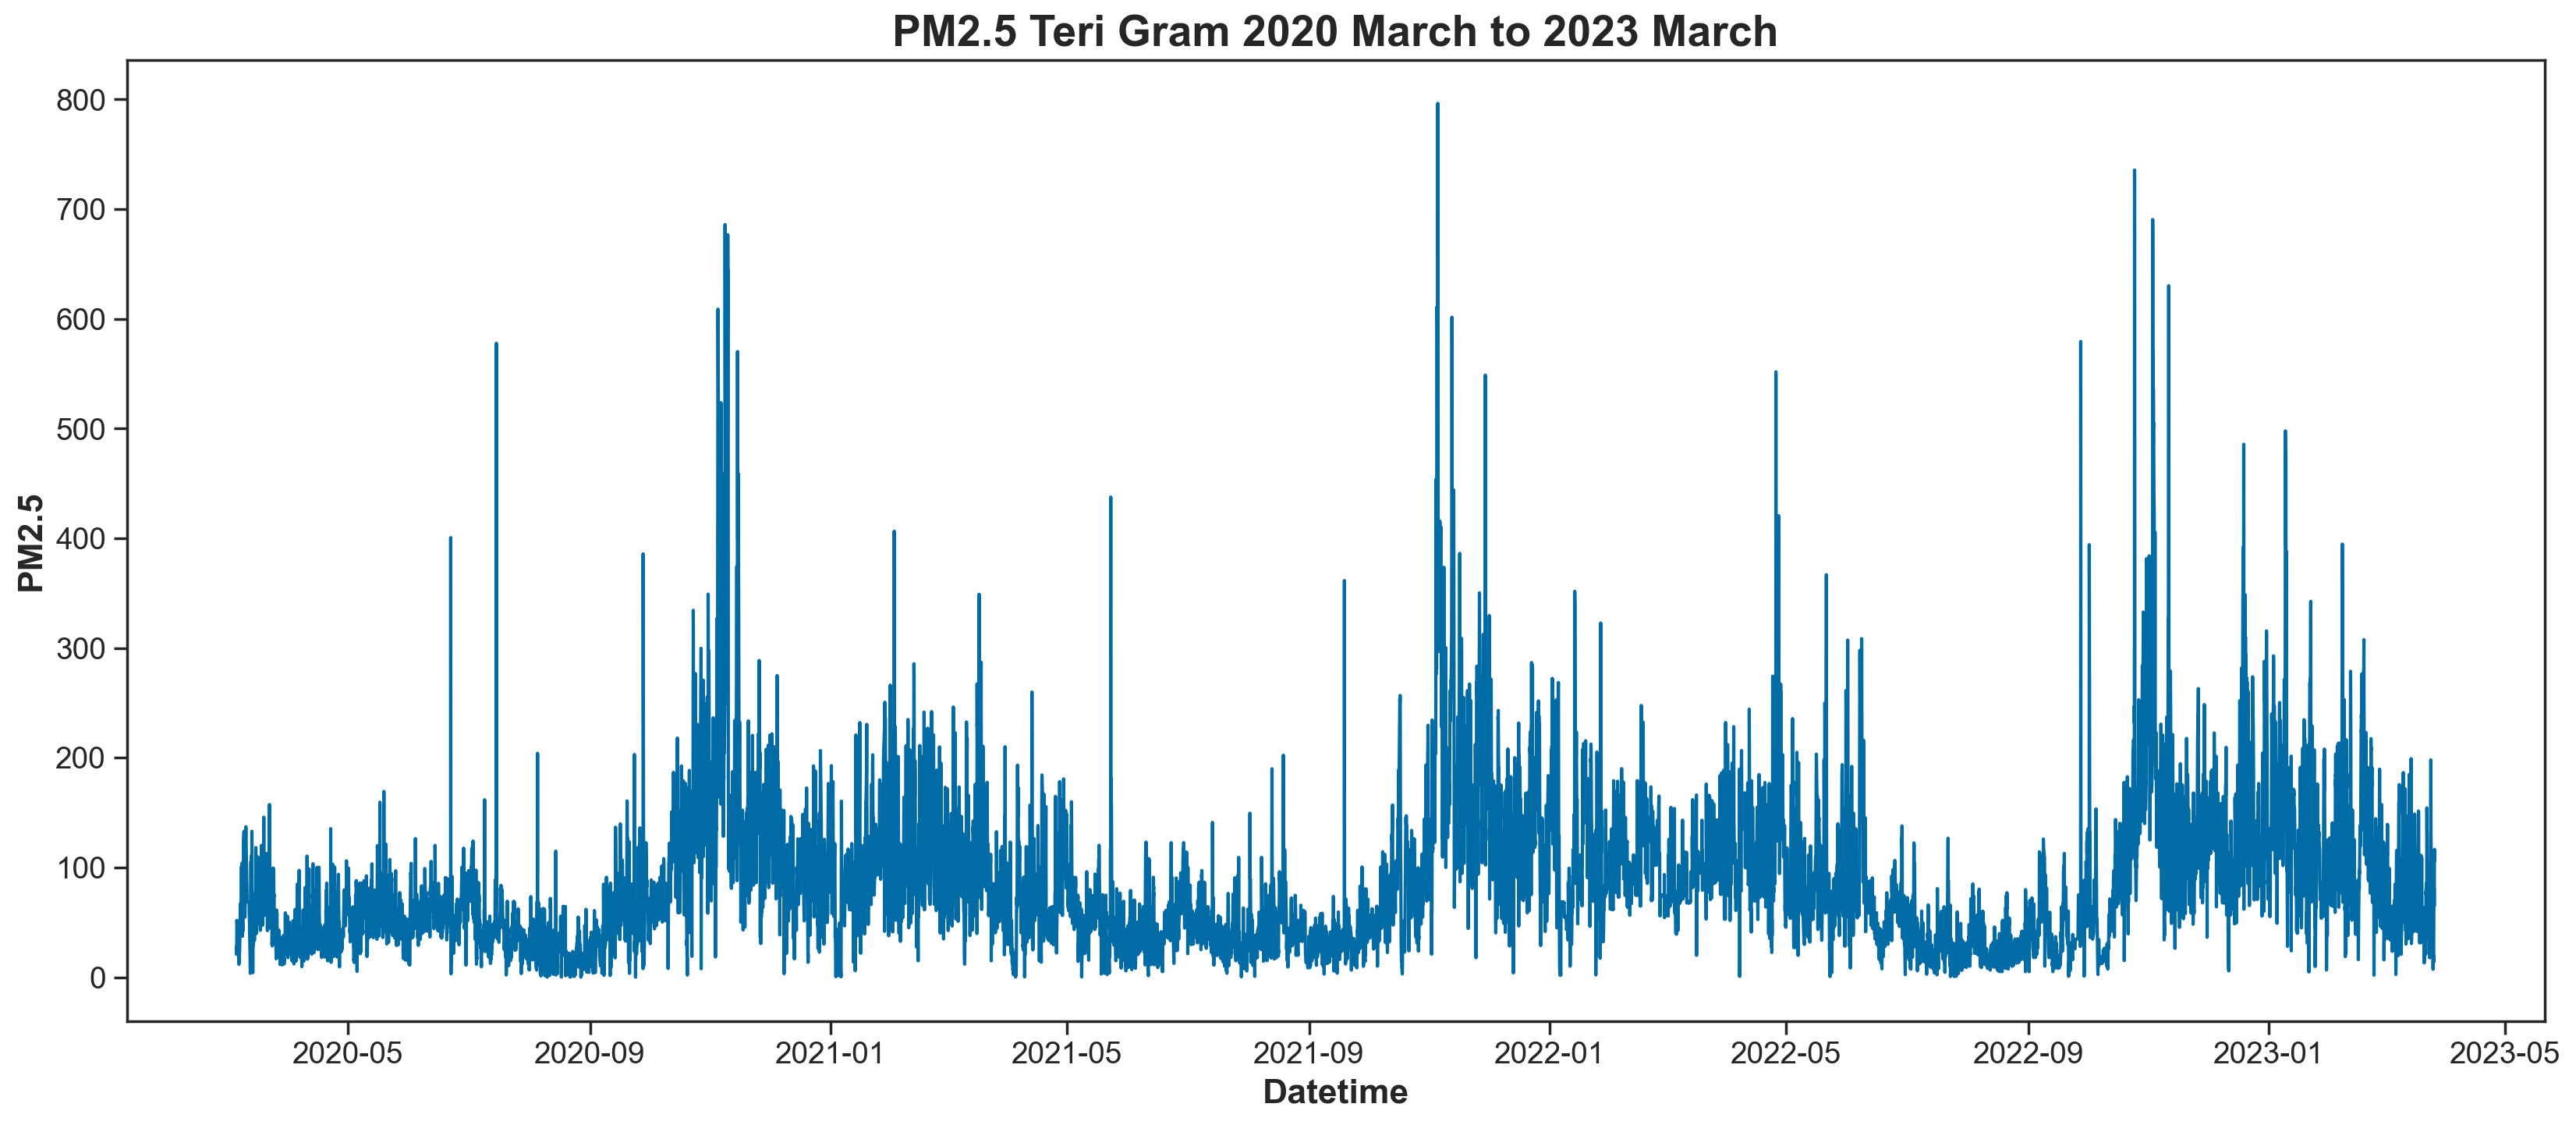

In [41]:
temp_2020 = compiled[:107273]
for i, j in enumerate(compiled[:107273]['Station'].unique()):
    print(i, j)
    plt.figure(figsize=(20,8))
    sns.lineplot(data=temp_2020[temp_2020['Station'] == j] , x="Datetime", y="PM2.5")
    plt.title(f"PM2.5 {j} 2020 March to 2023 March")
    plt.xlabel("Datetime")
    plt.ylabel("PM2.5")

In [44]:
def helper_2(df, col):
    
    df_na = df[df[col].isna()]
    
    df_na.fillna(1).groupby(by=['Year', "Month", "Station"]).count()
    
    df_na_col_count = df_na.fillna(1).groupby(
        by=['Year', "Month", "Station"])[col].count().reset_index()
    
    df_na_col_count["Year_Month"] = df_na_col_count["Year"].map(
        str) + ", " + df_na_col_count["Month"].map(str)

    return df_na_col_count

In [45]:
col = "PM2.5"
px.bar(data_frame = helper_2(compiled.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col
       )

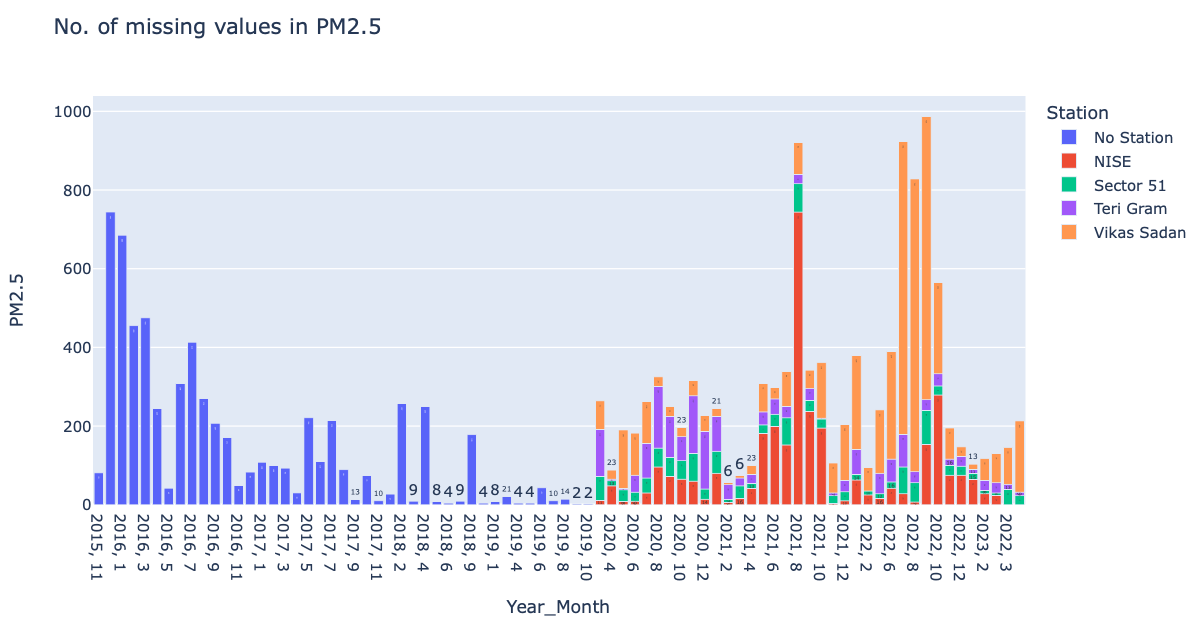

In [46]:
compiled.groupby(["Year"]).count()

Datetime  Station  PM2.5     NO    NO2    NOx    SO2     CO  Ozone  \
Year                                                                       
2015       825      825      0    454    455    455    452    403      0   
2016      8784     8784   5381   4647   5043   4041   6087   5098      0   
2017      8760     8760   7671   7613   7881   1623   7577   7997      0   
2018      8760     8760   8041   7865   7840   8463   5481   8588      0   
2019      8760     8760   8652   8564   8615   8605   7767   8640      0   
2020     33457    33457  31157  30511  31274  32461  24572  32483  27123   
2021     35040    35040  31685  32390  32383  32727  25066  32717  32398   
2022     35040    35040  29932  30073  30139  30840  20885  30964  30579   
2023      8105     8105   7755   7971   7983   8001   5648   7937   7832   

      Benzene  TOT-RF   PM10   AQI  AQI_Bucket    Day  Month   Week   Hour  
Year                                                                        
2015        0       0      0     0           0    825    825    825    825  
2016     1108       0      0  5113        5113   8784   8784   8784   8784  
2017     7924       0     10  7393        7393   8760   8760   8760   8760  
2018     6056       0   4799  7921        7921   8760   8760   8760   8760  
2019     8209       0   7380  8624        8624   8760   8760   8760   8760  
2020    25322   29088  24625  4369        4369  33457  33457  33457  33457  
2021    22682   35040  23613     0           0  35040  35040  35040  35040  
2022    14719   35040  24827     0           0  35040  35040  35040  35040  
2023     5997    8105   5915     0           0   8105   8105   8105   8105

In [47]:
# Since datetime has no missing values, we can consider it.

year_wise_count = compiled.groupby(["Year"])["Datetime"].count()
year_wise_count

Year
2015      825
2016     8784
2017     8760
2018     8760
2019     8760
2020    33457
2021    35040
2022    35040
2023     8105
Name: Datetime, dtype: int64

In [49]:
abs(compiled[compiled['Year'] == 2015].index[0] - compiled[compiled['Year'] == 2016].index[0])
year_wise_count[2015]

825

825

### 2015 - PM2.5

In [50]:
compiled_2015 = compiled[compiled['Year'] == 2015]
compiled_2015
compiled_2015.columns

Datetime     Station  PM2.5     NO    NO2    NOx    SO2  \
107273 2015-11-27 15:00:00  No Station    NaN    NaN  12.50   5.85    NaN   
107274 2015-11-27 16:00:00  No Station    NaN   4.02  10.03  10.34   8.38   
107275 2015-11-27 17:00:00  No Station    NaN  11.25   7.07  15.14  16.69   
107276 2015-11-27 18:00:00  No Station    NaN   4.55   7.06   8.44  18.85   
107277 2015-11-27 19:00:00  No Station    NaN   5.68   7.80   9.67  21.52   
...                    ...         ...    ...    ...    ...    ...    ...   
108093 2015-12-31 19:00:00  No Station    NaN  10.36  12.07  13.12   3.68   
108094 2015-12-31 20:00:00  No Station    NaN  11.22  21.07  13.74   4.07   
108095 2015-12-31 21:00:00  No Station    NaN  15.37  13.01  16.17   8.63   
108096 2015-12-31 22:00:00  No Station    NaN   5.17  15.99  11.18  11.13   
108097 2015-12-31 23:00:00  No Station    NaN    NaN    NaN    NaN    NaN   

          CO  Ozone  Benzene  TOT-RF  PM10  AQI AQI_Bucket  Day  Month  Year  \
107273  0.08    NaN      NaN     NaN   NaN  NaN        NaN   27     11  2015   
107274  1.40    NaN      NaN     NaN   NaN  NaN        NaN   27     11  2015   
107275  1.75    NaN      NaN     NaN   NaN  NaN        NaN   27     11  2015   
107276  2.91    NaN      NaN     NaN   NaN  NaN        NaN   27     11  2015   
107277  4.58    NaN      NaN     NaN   NaN  NaN        NaN   27     11  2015   
...      ...    ...      ...     ...   ...  ...        ...  ...    ...   ...   
108093  2.05    NaN      NaN     NaN   NaN  NaN        NaN   31     12  2015   
108094  1.37    NaN      NaN     NaN   NaN  NaN        NaN   31     12  2015   
108095  1.39    NaN      NaN     NaN   NaN  NaN        NaN   31     12  2015   
108096  1.54    NaN      NaN     NaN   NaN  NaN        NaN   31     12  2015   
108097   NaN    NaN      NaN     NaN   NaN  NaN        NaN   31     12  2015   

        Week  Hour  
107273    48    15  
107274    48    16  
107275    48    17  
107276    48    18  
107277    48    19  
...      ...   ...  
108093    53    19  
108094    53    20  
108095    53    21  
108096    53    22  
108097    53    23  

[825 rows x 19 columns]

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI', 'AQI_Bucket', 'Day',
       'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

In [65]:
compiled_2015['PM2.5'].value_counts(dropna=False)

NaN    825
Name: PM2.5, dtype: int64

- We see all NaNs in 2015, so let us ignore it.
- Let us confirm it with a plot.

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, '2015 PM2.5 data - Missing values imputed with -100')

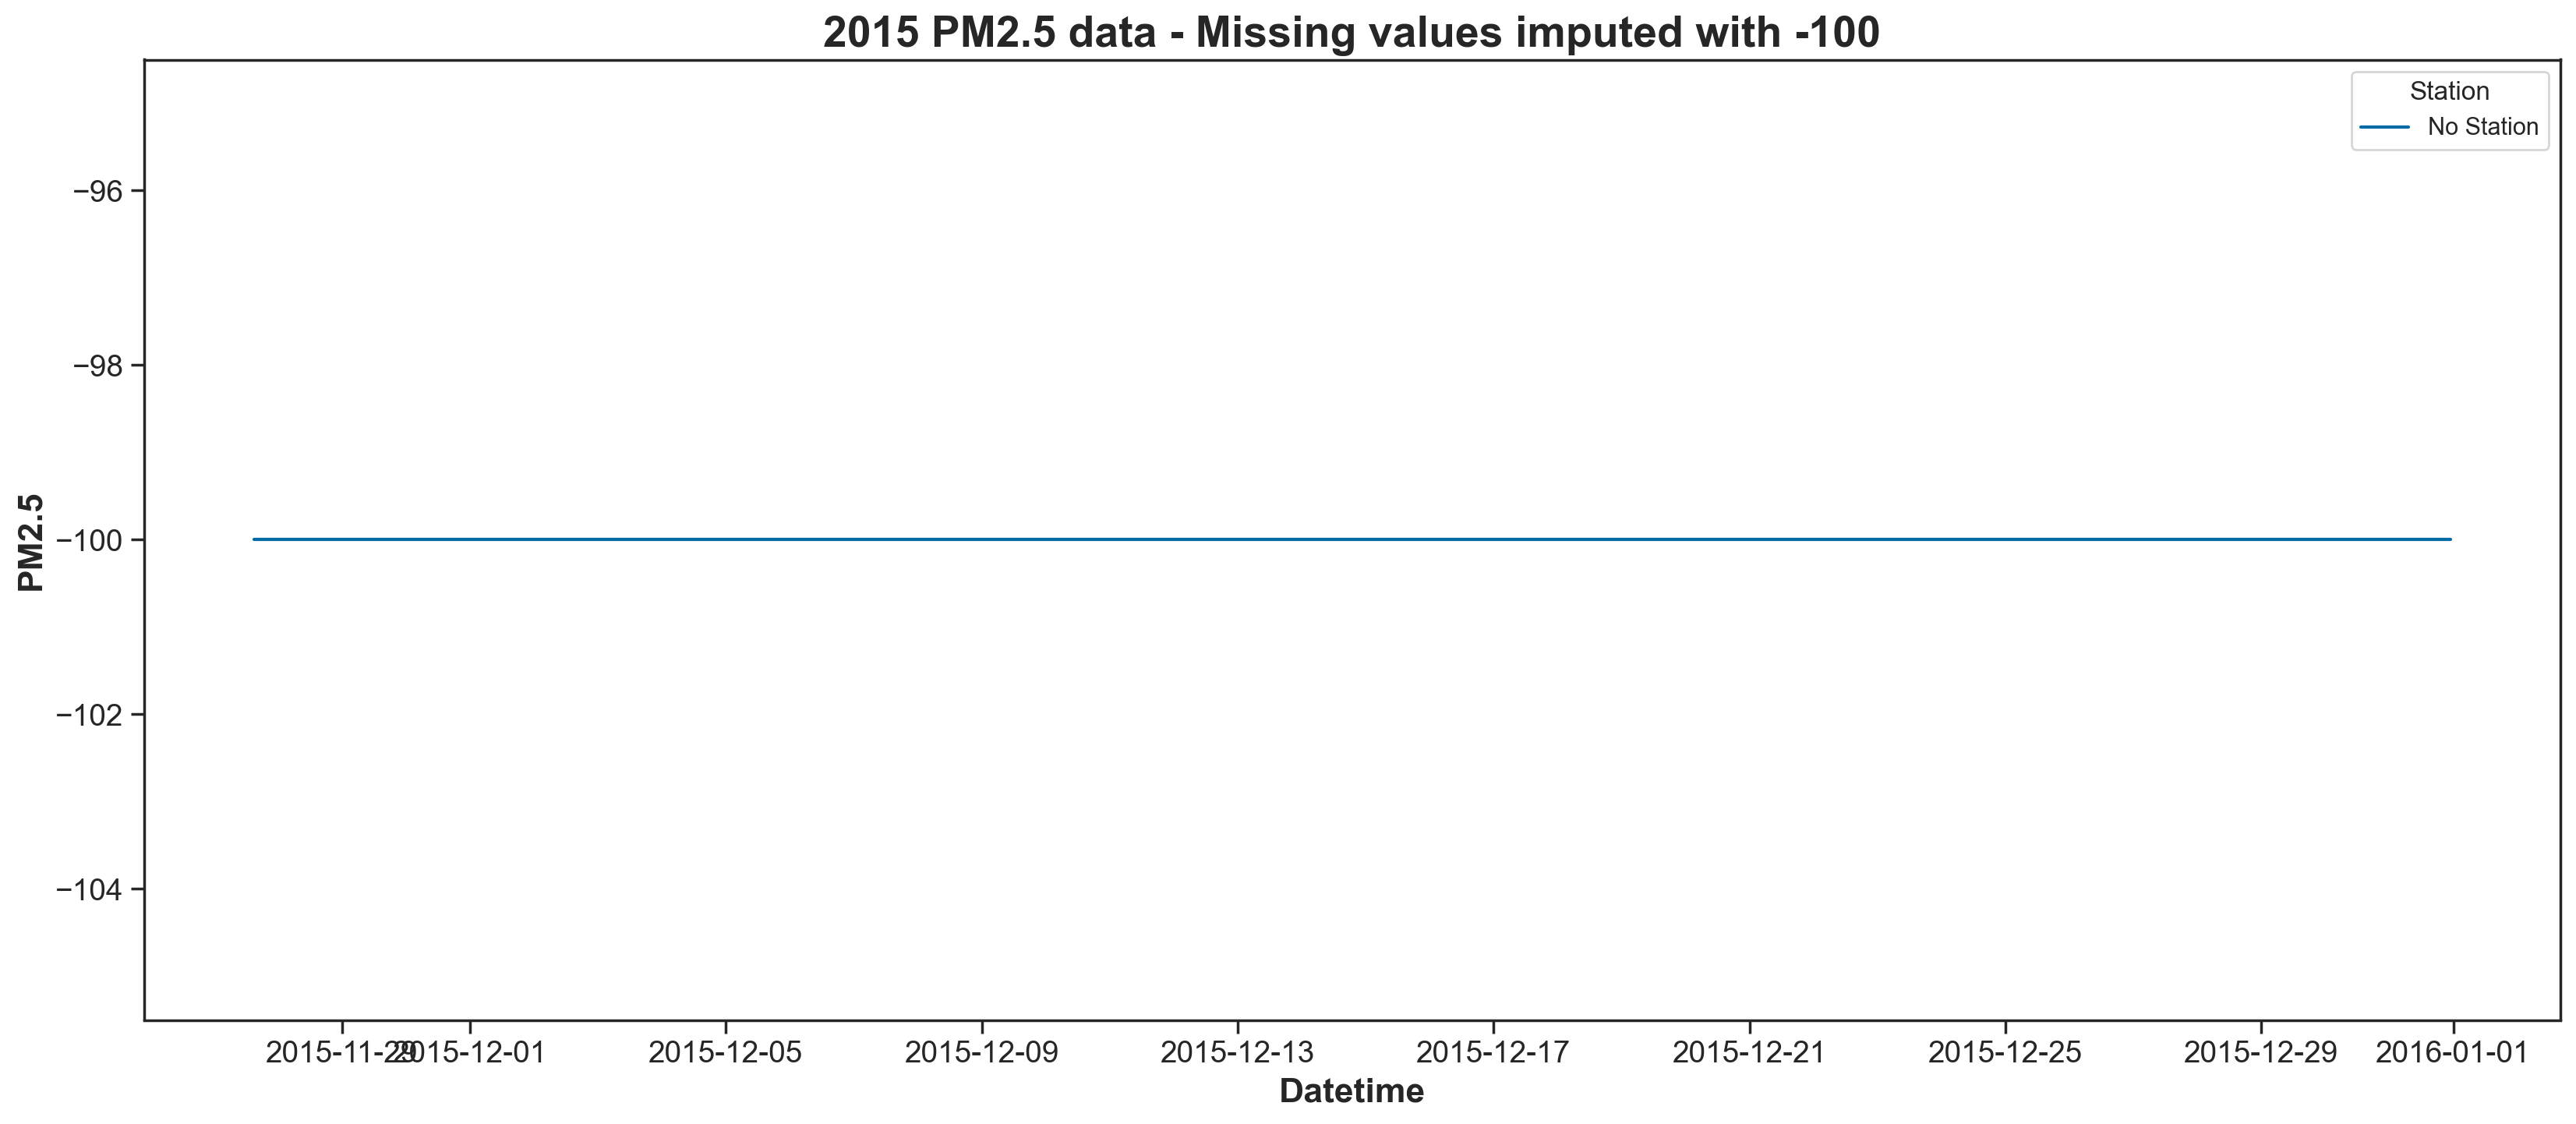

In [75]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=compiled_2015.fillna(-100) , x="Datetime", y="PM2.5", hue="Station")
plt.title("2015 PM2.5 data - Missing values imputed with -100")

In [54]:
col = "PM2.5"
px.bar(data_frame = helper_2(compiled_2015.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col +" in 2015"
       )

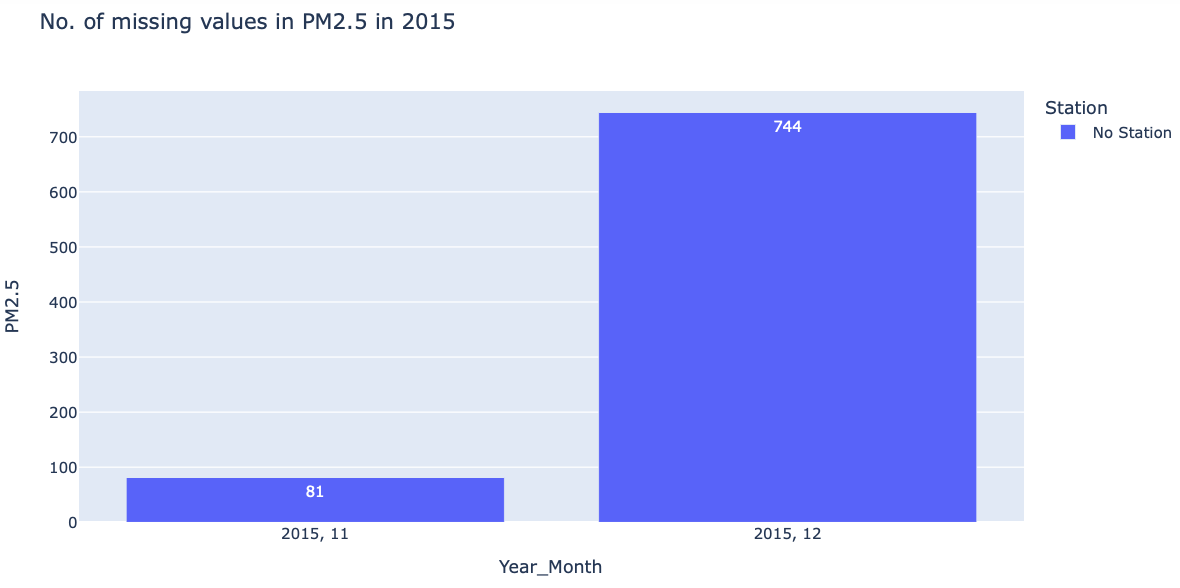

### PM2.5 - 2016

In [55]:
compiled_2016 = compiled[compiled['Year'] == 2016]
compiled_2016
compiled_2016.columns

Datetime     Station   PM2.5    NO    NO2  NOx   SO2     CO  \
108098 2016-01-01 00:00:00  No Station     NaN   NaN    NaN  NaN   NaN    NaN   
108099 2016-01-01 01:00:00  No Station     NaN   NaN    NaN  NaN   NaN    NaN   
108100 2016-01-01 02:00:00  No Station     NaN   NaN    NaN  NaN   NaN    NaN   
108101 2016-01-01 03:00:00  No Station     NaN   NaN    NaN  NaN   NaN    NaN   
108102 2016-01-01 04:00:00  No Station     NaN   NaN    NaN  NaN   NaN    NaN   
...                    ...         ...     ...   ...    ...  ...   ...    ...   
116877 2016-12-31 19:00:00  No Station  183.79  7.47  10.49  NaN  3.88  22.74   
116878 2016-12-31 20:00:00  No Station  201.53  7.86  10.24  NaN  2.36  27.72   
116879 2016-12-31 21:00:00  No Station  233.52  7.47  10.24  NaN  3.41  35.21   
116880 2016-12-31 22:00:00  No Station  268.24  7.47  10.27  NaN  3.96  34.39   
116881 2016-12-31 23:00:00  No Station  276.79  7.70  10.08  NaN  4.93  29.17   

        Ozone  Benzene  TOT-RF  PM10    AQI AQI_Bucket  Day  Month  Year  \
108098    NaN      NaN     NaN   NaN    NaN        NaN    1      1  2016   
108099    NaN      NaN     NaN   NaN    NaN        NaN    1      1  2016   
108100    NaN      NaN     NaN   NaN    NaN        NaN    1      1  2016   
108101    NaN      NaN     NaN   NaN    NaN        NaN    1      1  2016   
108102    NaN      NaN     NaN   NaN    NaN        NaN    1      1  2016   
...       ...      ...     ...   ...    ...        ...  ...    ...   ...   
116877    NaN     2.67     NaN   NaN  379.0  Very Poor   31     12  2016   
116878    NaN     2.89     NaN   NaN  379.0  Very Poor   31     12  2016   
116879    NaN     1.89     NaN   NaN  407.0     Severe   31     12  2016   
116880    NaN     4.22     NaN   NaN  407.0     Severe   31     12  2016   
116881    NaN     3.70     NaN   NaN  407.0     Severe   31     12  2016   

        Week  Hour  
108098    53     0  
108099    53     1  
108100    53     2  
108101    53     3  
108102    53     4  
...      ...   ...  
116877    52    19  
116878    52    20  
116879    52    21  
116880    52    22  
116881    52    23  

[8784 rows x 19 columns]

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI', 'AQI_Bucket', 'Day',
       'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, '2016 PM2.5 data')

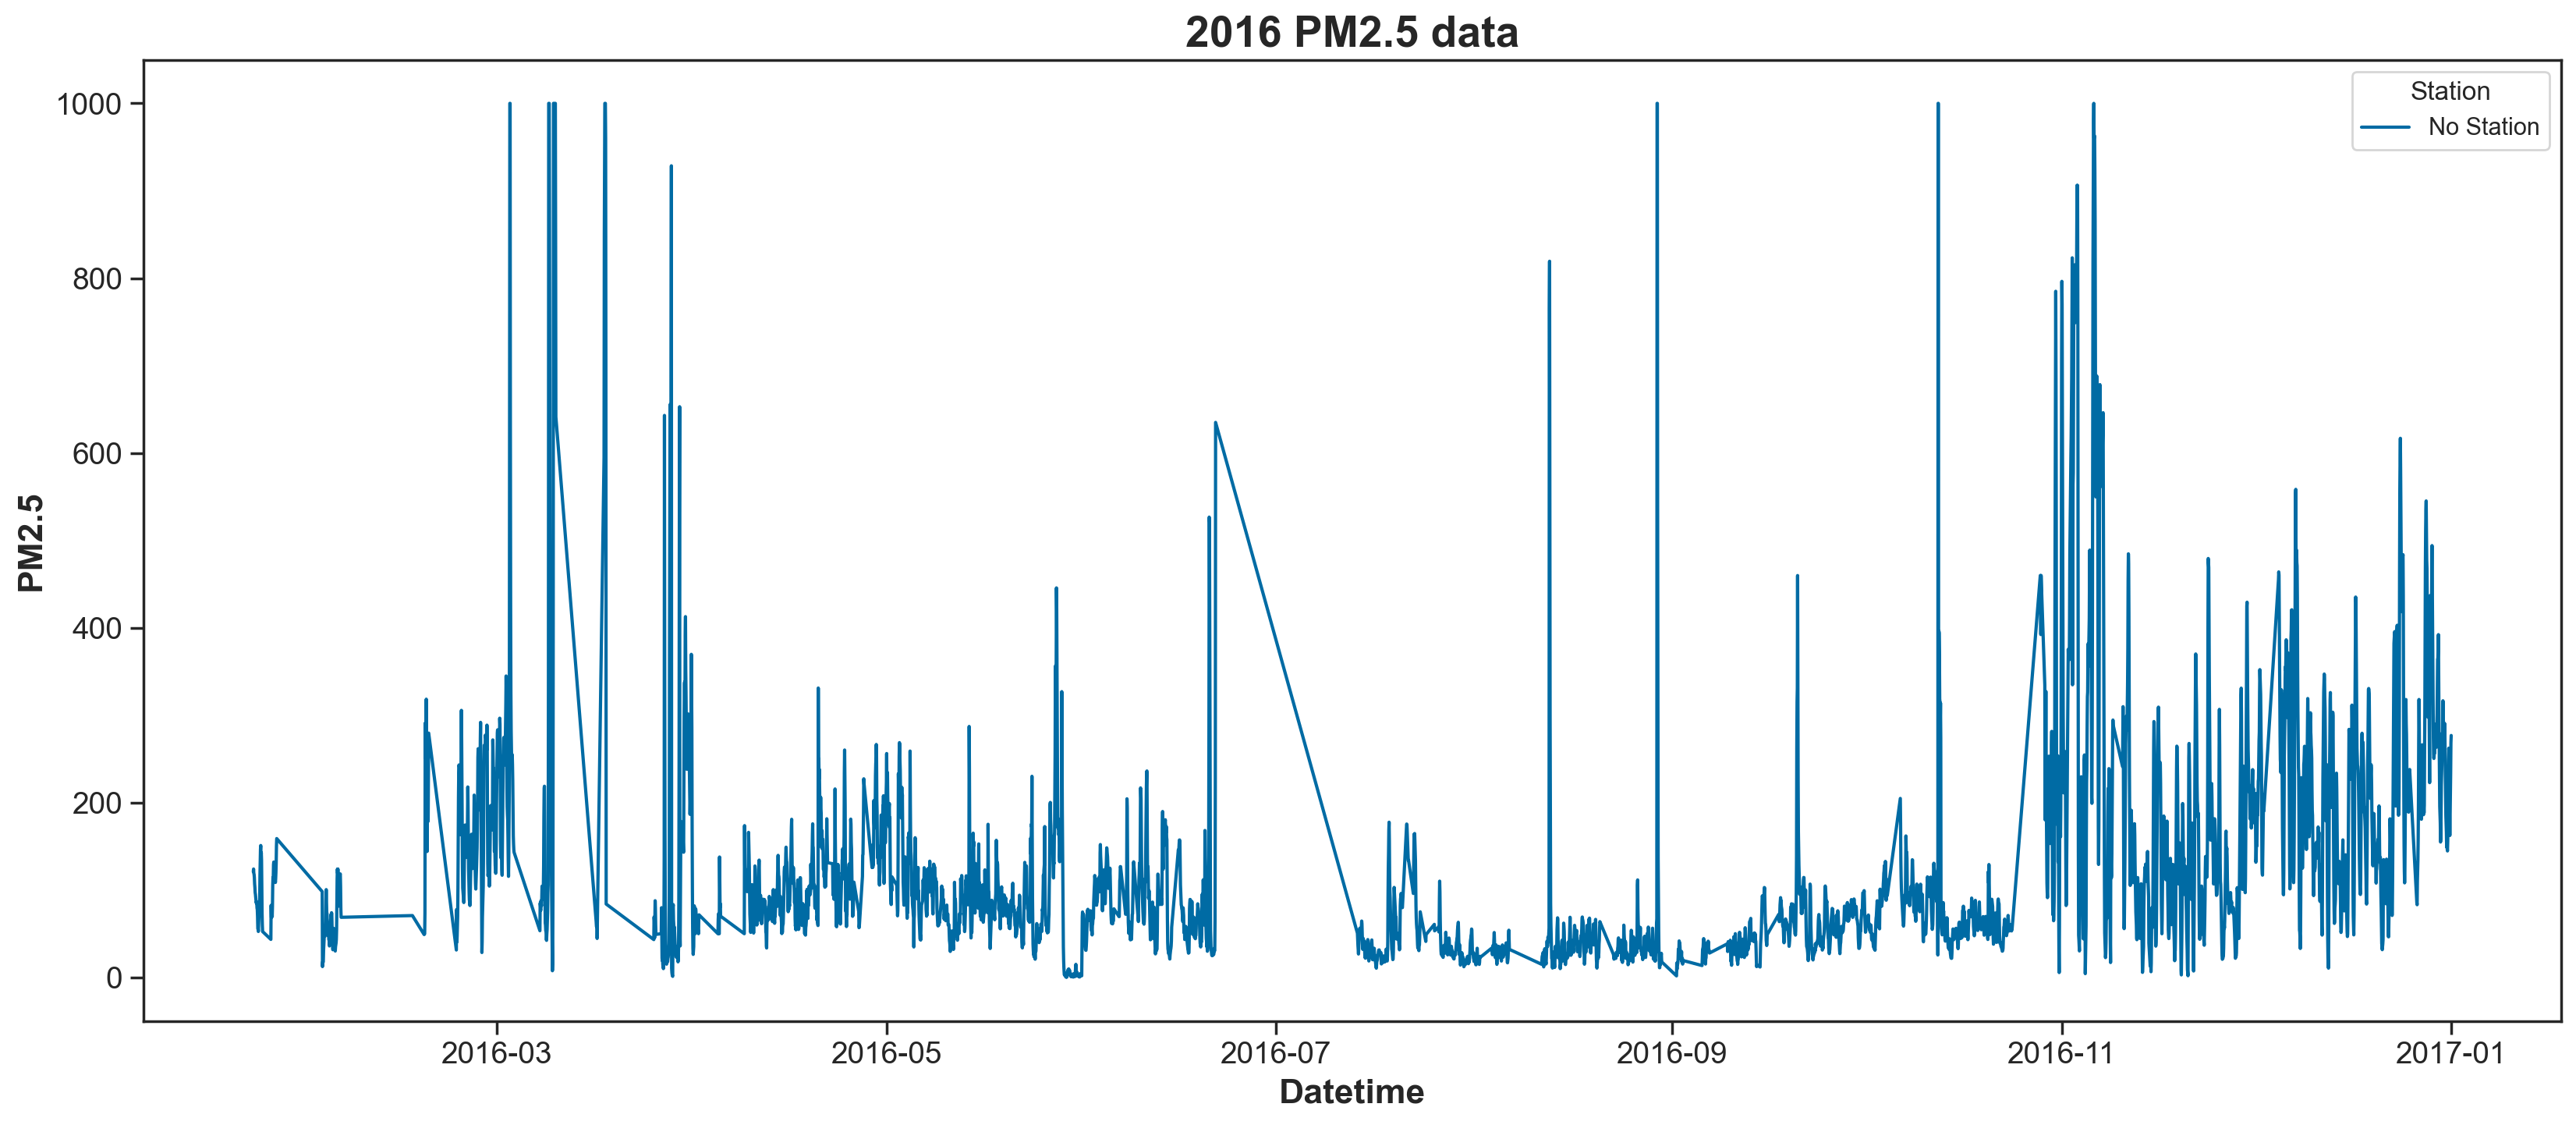

In [63]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=compiled_2016, x="Datetime", y="PM2.5", hue="Station", markers=['o']) 
plt.title("2016 PM2.5 data")

- Seaborn fills missing values. 
- There are no gaps in between for missing values.
- So let us impute with some negative number say -100 to make NaNs stand out and visualize them.

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, '2016 PM2.5 data - Missing values imputed with -100')

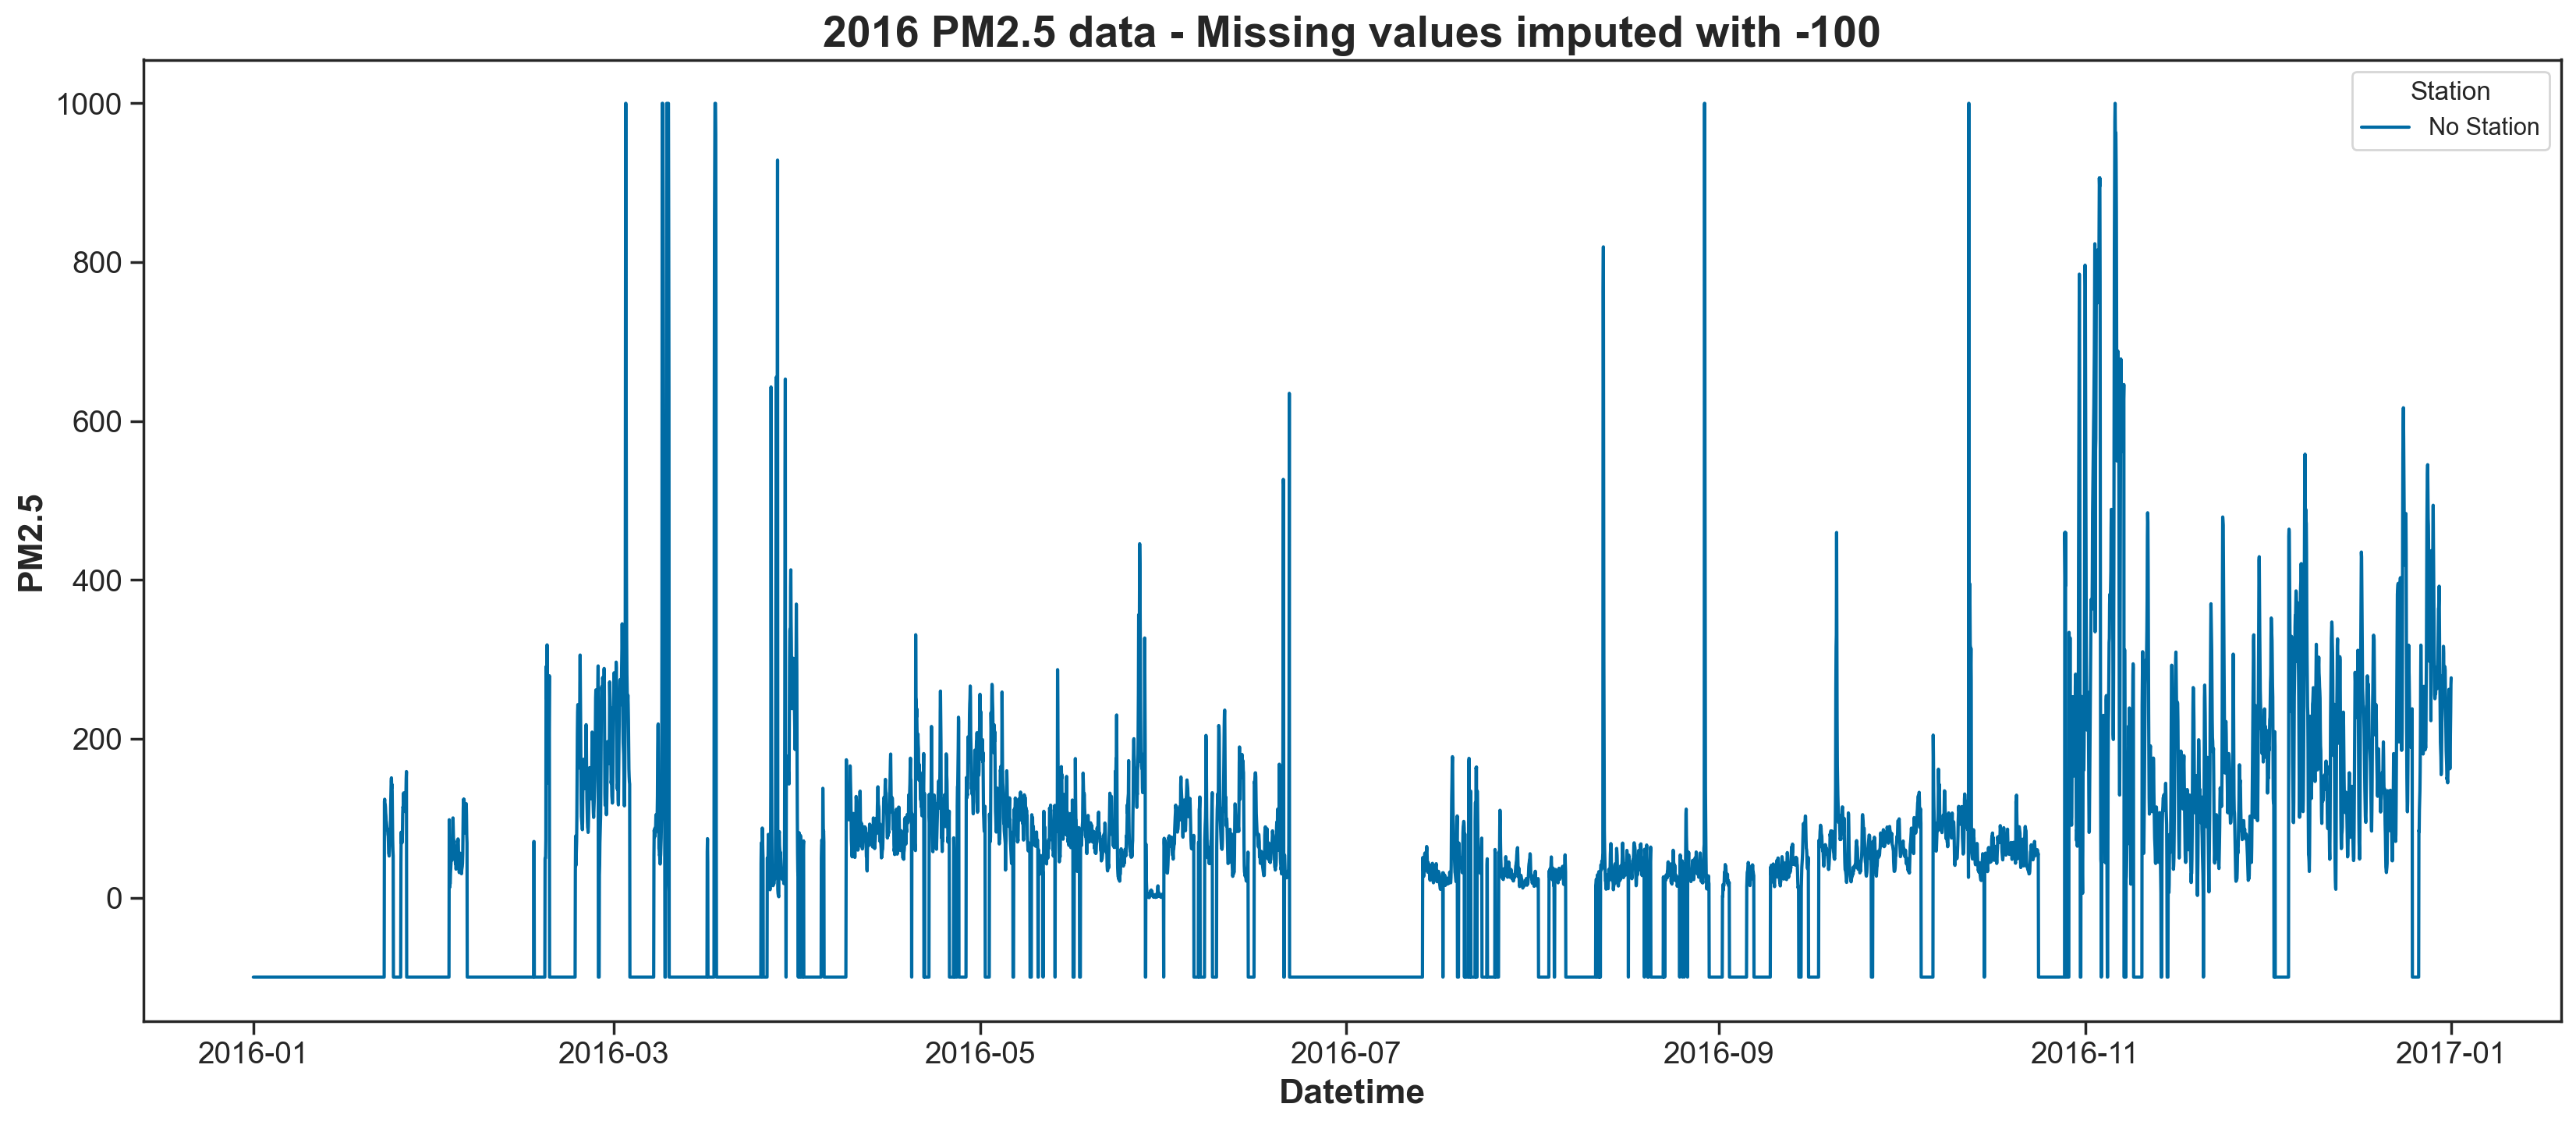

In [76]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=compiled_2016.fillna(-100), x="Datetime", y="PM2.5", hue="Station", markers=['o']) 
plt.title("2016 PM2.5 data - Missing values imputed with -100")

- Now, we can easily see NaNs (-100).

In [56]:
# Calculating missing values in PM2.5 2016

col = "PM2.5"
px.bar(data_frame = helper_2(compiled_2016.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col + " in 2016"
       )

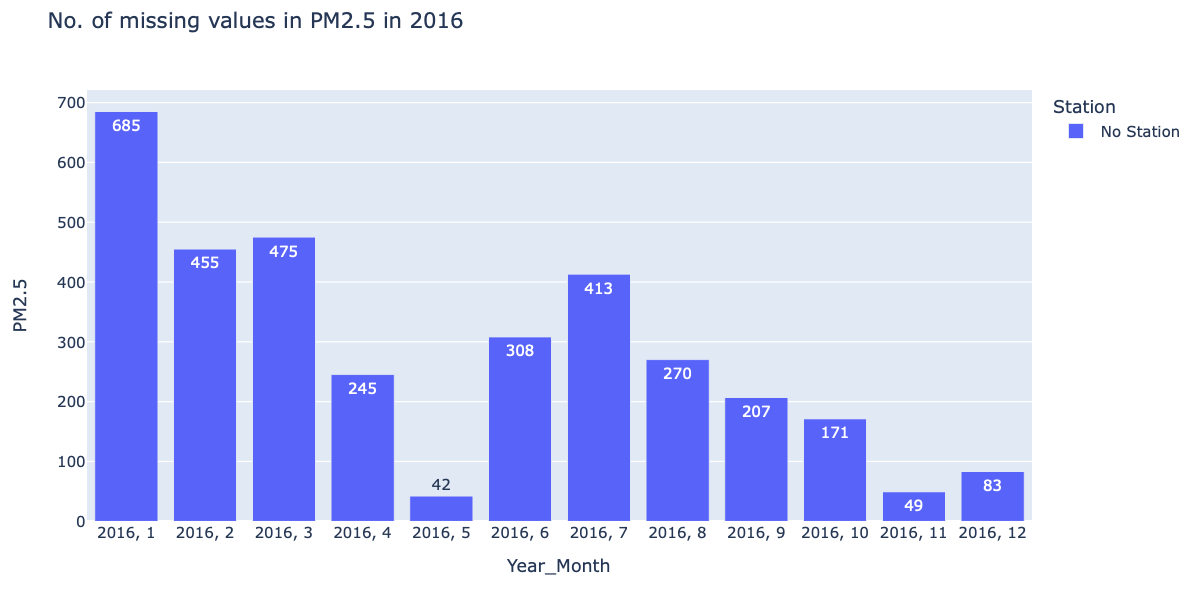

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='PM2.5'>

Text(0.5, 1.0, '2016 PM2.5 data')

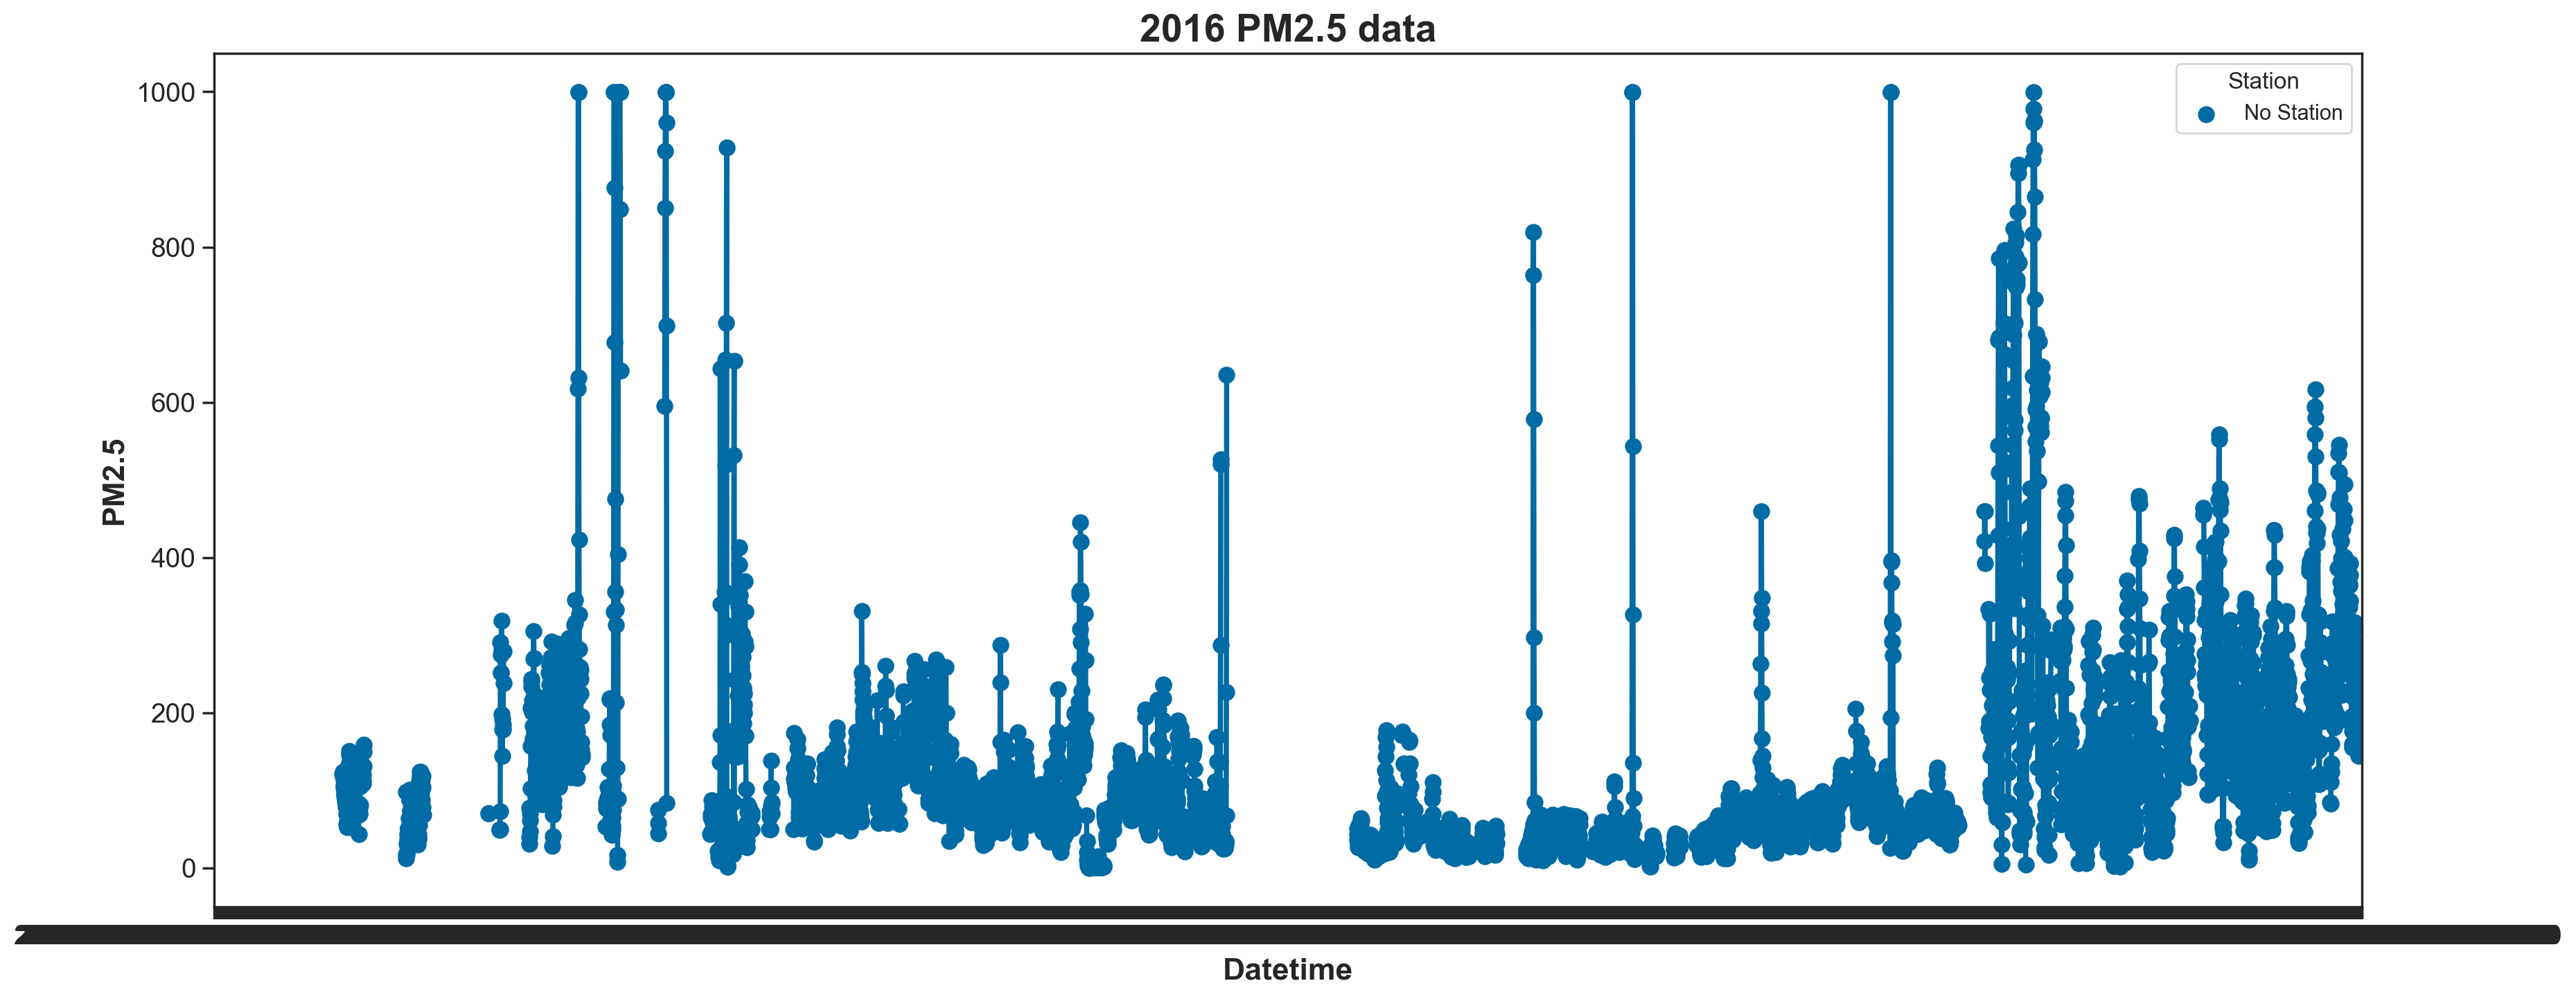

In [78]:
# Another way to see missing values is using point plot

plt.figure(figsize=(20, 8))
sns.pointplot(data=compiled_2016, x="Datetime", y="PM2.5", hue="Station", dodge=True) 
plt.title("2016 PM2.5 data")

#### Total data points in the graph
- Each day has 24 data points
- Each year has 365 days
- Total data points = 365 * 24 = 8760

In [79]:
# Using plotly - It does not fill NaNs

px.line(data_frame=compiled_2016, x="Datetime", y="PM2.5", title="2016 PM2.5 data")

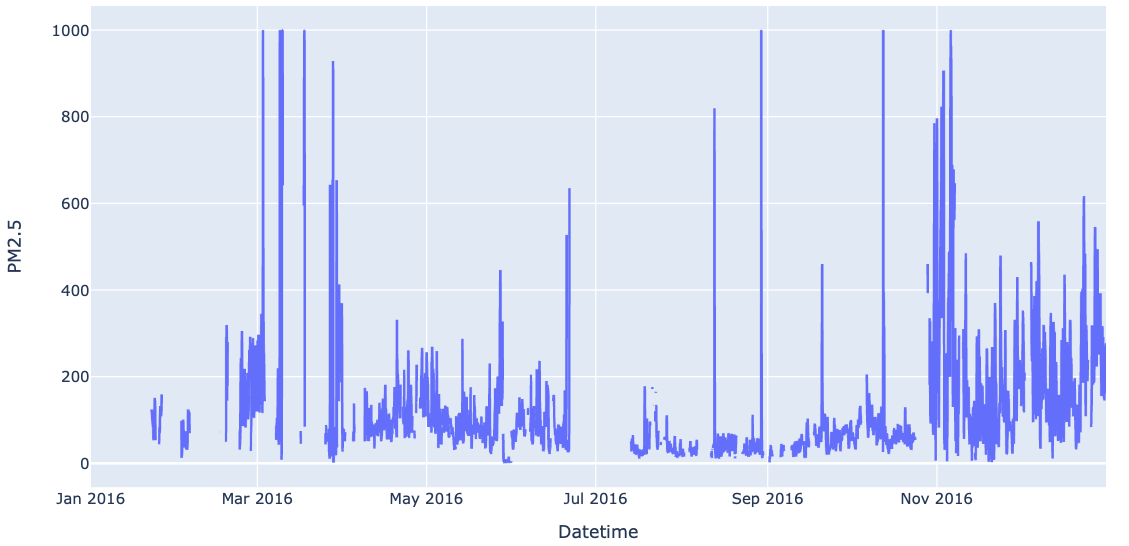

### PM2.5 - 2022

In [81]:
compiled_2022 = compiled[compiled['Year'] == 2022]
compiled_2022
compiled_2022.columns

Datetime      Station   PM2.5      NO    NO2     NOx    SO2  \
16032  2022-01-01 00:00:00  Vikas Sadan  269.20  346.11  70.77  305.94  16.88   
16033  2022-01-01 01:00:00  Vikas Sadan  295.80  188.91  58.07  173.53  15.57   
16034  2022-01-01 02:00:00  Vikas Sadan  279.52  233.19  45.33  202.29  18.98   
16035  2022-01-01 03:00:00  Vikas Sadan  252.35  167.72  46.35  150.44  10.58   
16036  2022-01-01 04:00:00  Vikas Sadan  212.05  114.69  45.33  107.49   8.38   
...                    ...          ...     ...     ...    ...     ...    ...   
105244 2022-12-31 19:00:00    Teri Gram   85.25    9.74  24.48   20.60   9.14   
105245 2022-12-31 20:00:00    Teri Gram   83.28   10.68  24.78   21.51   2.45   
105246 2022-12-31 21:00:00    Teri Gram   80.98   19.30  24.28   28.16   1.88   
105247 2022-12-31 22:00:00    Teri Gram   84.42   19.52  20.30   26.27   0.76   
105248 2022-12-31 23:00:00    Teri Gram   89.30   20.20  17.58   25.38   0.77   

          CO  Ozone  Benzene  TOT-RF    PM10  AQI AQI_Bucket  Day  Month  \
16032   2.23  21.21     4.01     0.0     NaN  NaN        NaN    1      1   
16033   1.47  62.39     4.01     0.0     NaN  NaN        NaN    1      1   
16034   1.91   8.98     3.99     0.0     NaN  NaN        NaN    1      1   
16035   1.28   5.71     3.97     0.0     NaN  NaN        NaN    1      1   
16036   1.29  22.10     4.02     0.0     NaN  NaN        NaN    1      1   
...      ...    ...      ...     ...     ...  ...        ...  ...    ...   
105244  0.63  10.70     6.40     0.0  172.40  NaN        NaN   31     12   
105245  0.71  11.32     6.46     0.0  141.30  NaN        NaN   31     12   
105246  0.78  10.65     6.43     0.0  155.15  NaN        NaN   31     12   
105247  0.82  10.11     6.49     0.0  164.50  NaN        NaN   31     12   
105248  0.88  10.27     6.40     0.0  162.00  NaN        NaN   31     12   

        Year  Week  Hour  
16032   2022    52     0  
16033   2022    52     1  
16034   2022    52     2  
16035   2022    52     3  
16036   2022    52     4  
...      ...   ...   ...  
105244  2022    52    19  
105245  2022    52    20  
105246  2022    52    21  
105247  2022    52    22  
105248  2022    52    23  

[35040 rows x 19 columns]

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI', 'AQI_Bucket', 'Day',
       'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

In [82]:
col = "PM2.5"
px.bar(data_frame = helper_2(compiled_2022.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col + " in 2022"
       )

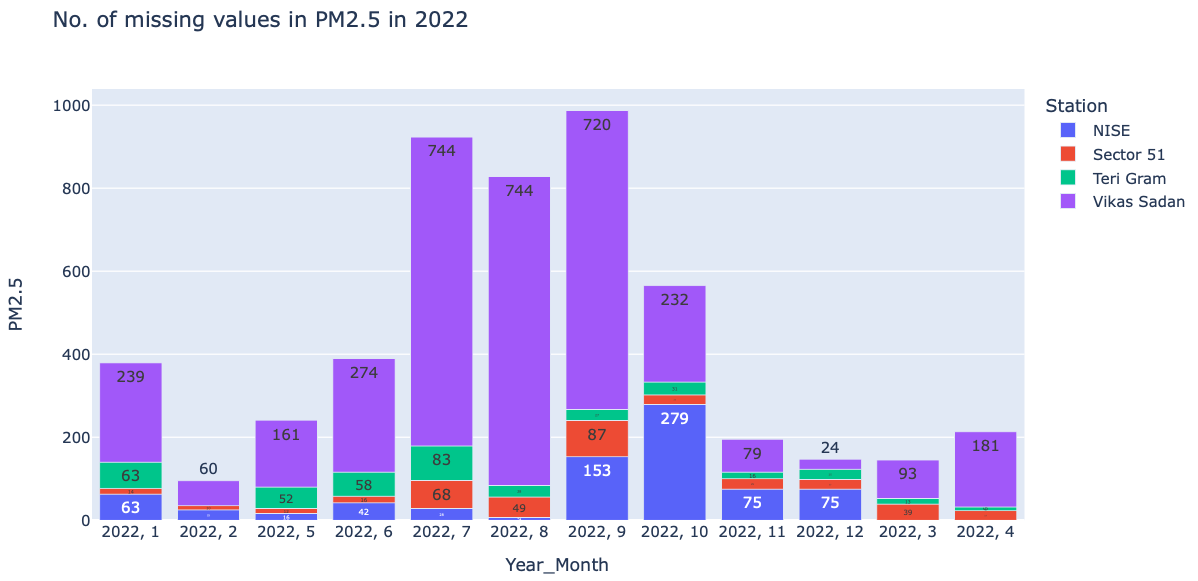

In [84]:
px.line(data_frame=compiled_2022.bfill(), x="Datetime", y="PM2.5", color="Station", title="2022 PM2.5 data filled NaNs with bfill()")

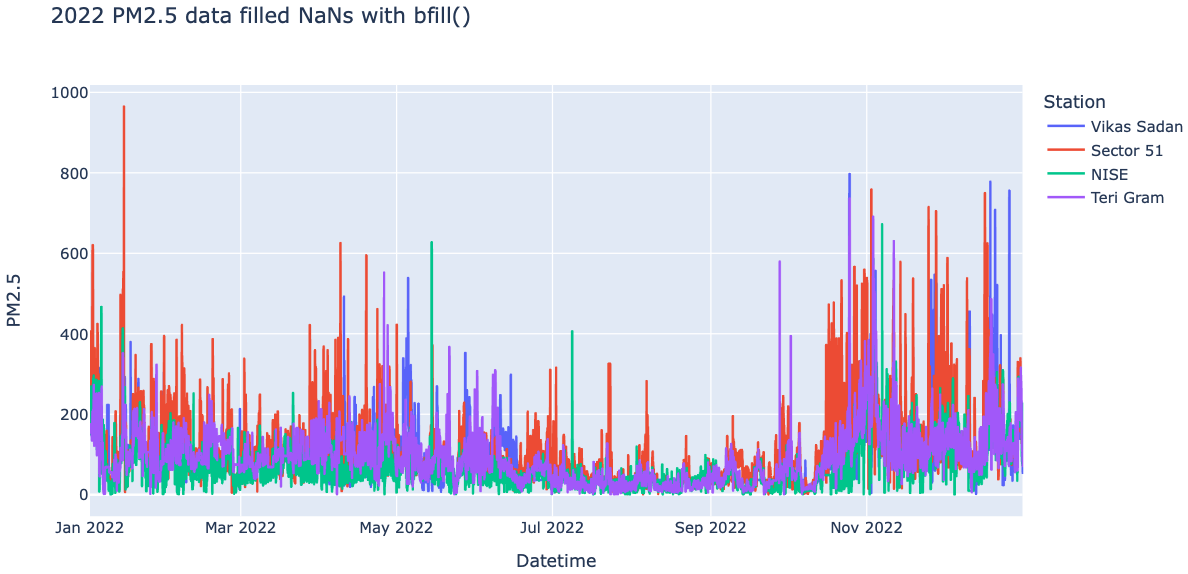

### PM2.5 - 2023

In [85]:
compiled_2023 = compiled[compiled['Year'] == 2023]
compiled_2023
compiled_2023.columns

Datetime      Station   PM2.5     NO    NO2    NOx    SO2  \
24792  2023-01-01 00:00:00  Vikas Sadan   88.38  12.02  21.48  41.77   3.69   
24793  2023-01-01 01:00:00  Vikas Sadan   77.93  12.16  22.59  42.79   3.62   
24794  2023-01-01 02:00:00  Vikas Sadan   78.16  11.55  21.59  39.42   3.73   
24795  2023-01-01 03:00:00  Vikas Sadan   84.96  11.45  20.96  39.82   3.69   
24796  2023-01-01 04:00:00  Vikas Sadan   78.38  11.84  21.06  41.66   3.62   
...                    ...          ...     ...    ...    ...    ...    ...   
107268 2023-03-26 03:00:00    Teri Gram   64.75  16.85   6.92  17.12  18.19   
107269 2023-03-26 04:00:00    Teri Gram   88.17  18.63   6.10  18.12  14.92   
107270 2023-03-26 05:00:00    Teri Gram  116.45  14.24   5.93  14.52  13.69   
107271 2023-03-26 06:00:00    Teri Gram  105.82  12.70   6.06  13.35  14.45   
107272 2023-03-26 07:00:00    Teri Gram     NaN    NaN    NaN    NaN    NaN   

          CO   Ozone  Benzene  TOT-RF    PM10  AQI AQI_Bucket  Day  Month  \
24792   0.92   92.40     2.35     0.0     NaN  NaN        NaN    1      1   
24793   1.26   80.43     2.38     0.0     NaN  NaN        NaN    1      1   
24794   0.86  132.42     2.25     0.0     NaN  NaN        NaN    1      1   
24795   1.28  164.41     2.23     0.0     NaN  NaN        NaN    1      1   
24796   0.91  158.67     3.86     0.0     NaN  NaN        NaN    1      1   
...      ...     ...      ...     ...     ...  ...        ...  ...    ...   
107268  0.90     NaN     6.65     0.0  266.52  NaN        NaN   26      3   
107269  0.77   23.53     7.52     0.0  285.07  NaN        NaN   26      3   
107270  0.72   23.54     7.92     0.0  278.62  NaN        NaN   26      3   
107271  0.66   23.56     7.39     0.0  266.82  NaN        NaN   26      3   
107272   NaN     NaN      NaN     0.0     NaN  NaN        NaN   26      3   

        Year  Week  Hour  
24792   2023    52     0  
24793   2023    52     1  
24794   2023    52     2  
24795   2023    52     3  
24796   2023    52     4  
...      ...   ...   ...  
107268  2023    12     3  
107269  2023    12     4  
107270  2023    12     5  
107271  2023    12     6  
107272  2023    12     7  

[8105 rows x 19 columns]

Index(['Datetime', 'Station', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'TOT-RF', 'PM10', 'AQI', 'AQI_Bucket', 'Day',
       'Month', 'Year', 'Week', 'Hour'],
      dtype='object')

In [86]:
col = "PM2.5"
px.bar(data_frame = helper_2(compiled_2023.copy(deep=True), col),
       x = "Year_Month",
       y = col,
       color="Station",
       text_auto = True,
       title = "No. of missing values in "+ col + " in 2023"
       )

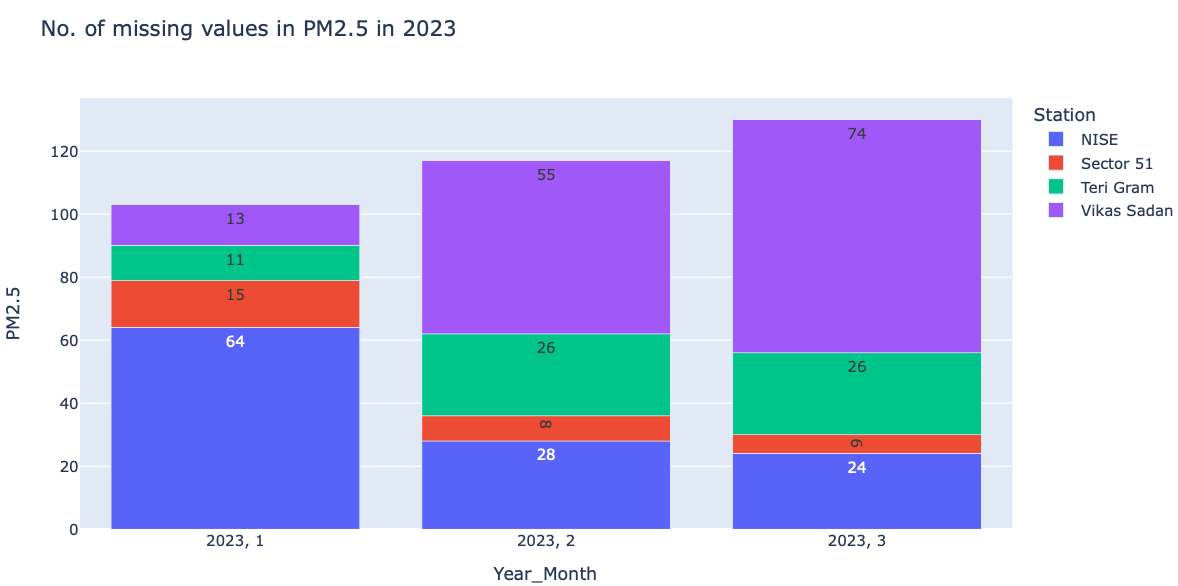

In [87]:
px.line(data_frame=compiled_2023, x="Datetime", y="PM2.5", title="PM2.5 2023 data")

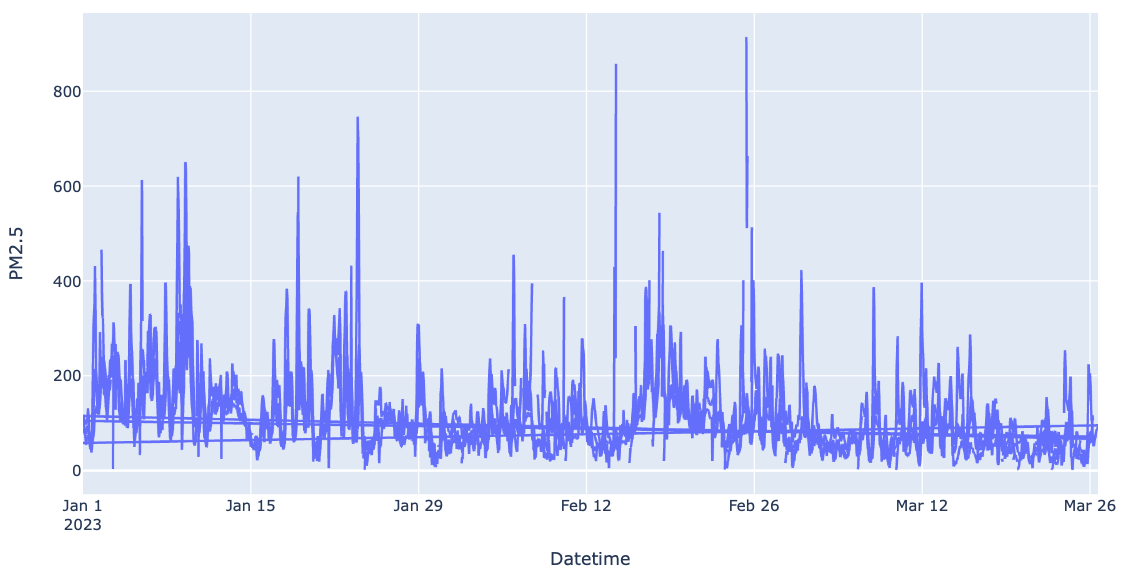

In [88]:
px.line(data_frame=compiled_2023, x="Datetime", y="PM2.5", color="Station", title="PM2.5 2023 data- Station wise")

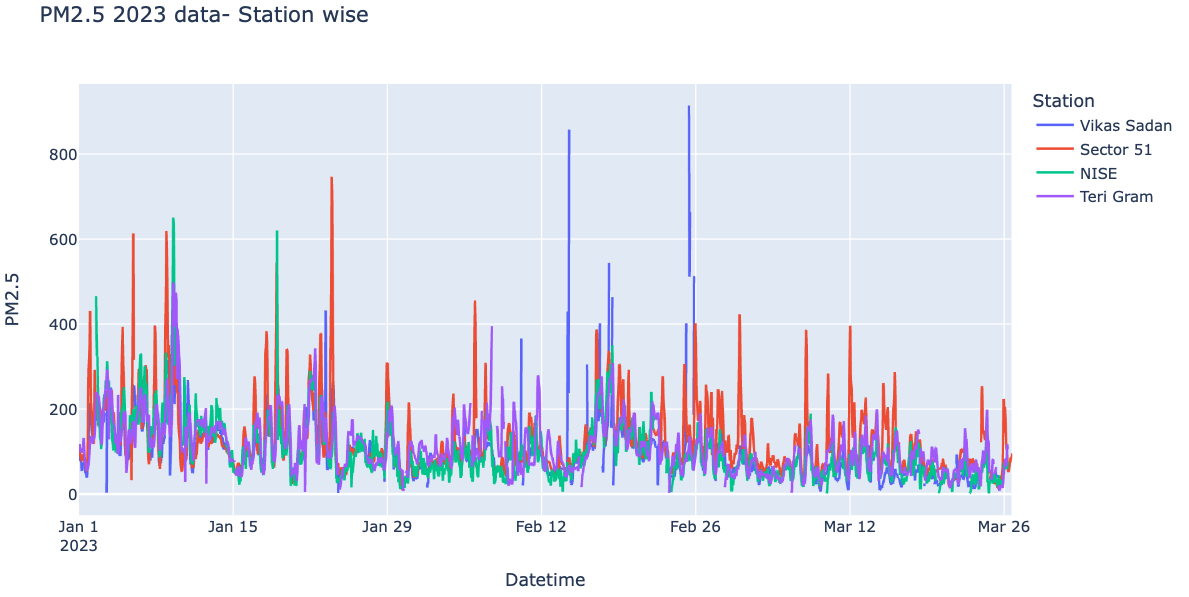

## POC - Filling NA using bfill method on Feb 28 2023

In [91]:
# February 2023

temp = compiled[ (compiled['Year'] == 2023) & (compiled['Month'] == 2)].sort_values(['Station', 'Datetime'])
temp["PM2.5"].isna().sum()
temp["PM2.5"].value_counts(dropna=False)

117

NaN       117
80.12       3
72.95       3
54.00       3
118.07      3
         ... 
158.20      1
70.17       1
75.07       1
77.30       1
53.45       1
Name: PM2.5, Length: 2335, dtype: int64

- There are 117 NaNs in February 2023 in PM2.5 column

In [92]:
# Checking how to validate NaNs

temp.loc[26132,"PM2.5"]
repr(temp.loc[26132,"PM2.5"])
temp.loc[26132,"PM2.5"].dtype
repr(temp.loc[26132,"PM2.5"]) == repr(np.nan) #WORKS :))

nan

'nan'

dtype('float64')

True

In [94]:
x = compiled[ (compiled['Year'] == 2023) & (compiled['Month'] == 2) & (compiled['Day'] == 28) ].sort_values(['Station','Datetime'])
x[x["PM2.5"].isna()]

Datetime      Station  PM2.5     NO    NO2    NOx    SO2  \
106653 2023-02-28 12:00:00    Teri Gram    NaN  13.89  14.05  18.48    NaN   
106654 2023-02-28 13:00:00    Teri Gram    NaN  11.56  11.07  15.05   0.47   
26195  2023-02-28 11:00:00  Vikas Sadan    NaN  47.67  41.16  55.93  16.76   
26196  2023-02-28 12:00:00  Vikas Sadan    NaN  17.35  30.27  47.43  11.85   

          CO  Ozone  Benzene  TOT-RF    PM10  AQI AQI_Bucket  Day  Month  \
106653  0.69  25.67     7.29     0.0     NaN  NaN        NaN   28      2   
106654  0.61  24.63     6.61     0.0  163.05  NaN        NaN   28      2   
26195   1.81  65.62     5.72     0.0     NaN  NaN        NaN   28      2   
26196   4.93  49.60     5.79     0.0     NaN  NaN        NaN   28      2   

        Year  Week  Hour  
106653  2023     9    12  
106654  2023     9    13  
26195   2023     9    11  
26196   2023     9    12

In [97]:
x 

Datetime      Station   PM2.5     NO    NO2     NOx    SO2  \
79825 2023-02-28 00:00:00         NISE   69.15   7.55  90.04   97.59    NaN   
79826 2023-02-28 01:00:00         NISE   62.29   7.68  78.97   86.65    NaN   
79827 2023-02-28 02:00:00         NISE  115.27  11.95  86.16   98.06    NaN   
79828 2023-02-28 03:00:00         NISE  152.46  27.06  78.56  105.66    NaN   
79829 2023-02-28 04:00:00         NISE  106.52  13.40  64.41   77.79    NaN   
...                   ...          ...     ...    ...    ...     ...    ...   
26203 2023-02-28 19:00:00  Vikas Sadan   51.96  17.34  30.16   47.45  23.31   
26204 2023-02-28 20:00:00  Vikas Sadan   54.99  17.41  30.34   48.42  23.01   
26205 2023-02-28 21:00:00  Vikas Sadan   51.93  17.23  30.07   47.14  23.61   
26206 2023-02-28 22:00:00  Vikas Sadan   55.07  17.18  30.21   47.69  26.84   
26207 2023-02-28 23:00:00  Vikas Sadan   53.45  17.30  29.89   48.15  27.49   

         CO  Ozone  Benzene  TOT-RF    PM10  AQI AQI_Bucket  Day  Month  Year  \
79825  1.21   1.87      NaN     0.0  190.88  NaN        NaN   28      2  2023   
79826  1.22   2.07      NaN     0.0  184.76  NaN        NaN   28      2  2023   
79827  1.53   1.52      NaN     0.0  230.68  NaN        NaN   28      2  2023   
79828  1.25   1.17      NaN     0.0  228.70  NaN        NaN   28      2  2023   
79829  1.04   0.59      NaN     0.0  154.17  NaN        NaN   28      2  2023   
...     ...    ...      ...     ...     ...  ...        ...  ...    ...   ...   
26203  0.09  32.35     8.79     0.0     NaN  NaN        NaN   28      2  2023   
26204  0.42  35.43     9.02     0.0     NaN  NaN        NaN   28      2  2023   
26205  0.46  35.41     8.72     0.0     NaN  NaN        NaN   28      2  2023   
26206  0.39  43.09     8.21     0.0     NaN  NaN        NaN   28      2  2023   
26207  0.36  69.84     8.13     0.0     NaN  NaN        NaN   28      2  2023   

       Week  Hour  
79825     9     0  
79826     9     1  
79827     9     2  
79828     9     3  
79829     9     4  
...     ...   ...  
26203     9    19  
26204     9    20  
26205     9    21  
26206     9    22  
26207     9    23  

[96 rows x 19 columns]

- We are seeing 28th February data, we have 4 stations, so total # of rows = 24 * 4 = 96
- We get 96 rows in the dataframe.

In [95]:
y = x[40:80]
y["PM2.5"].bfill(inplace=True)
y

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_8450/2576939870.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Datetime      Station   PM2.5     NO    NO2    NOx    SO2  \
53016  2023-02-28 16:00:00    Sector 51   96.70   4.20  28.10  16.45   3.08   
53017  2023-02-28 17:00:00    Sector 51  105.72   5.09  28.89  17.58   3.25   
53018  2023-02-28 18:00:00    Sector 51   96.40   5.52  30.57  18.60   3.16   
53019  2023-02-28 19:00:00    Sector 51  104.45   5.97  30.49  19.12   3.22   
53020  2023-02-28 20:00:00    Sector 51  106.23   7.82  29.36  20.00   1.96   
53021  2023-02-28 21:00:00    Sector 51  115.35  11.02  28.66  21.80   1.80   
53022  2023-02-28 22:00:00    Sector 51  138.03  12.84  28.09  23.37   1.64   
53023  2023-02-28 23:00:00    Sector 51  137.13  13.54  27.78  23.76   1.83   
106641 2023-02-28 00:00:00    Teri Gram  103.27  21.74  11.94  23.67   7.78   
106642 2023-02-28 01:00:00    Teri Gram   99.43  22.47  10.53  23.52   8.42   
106643 2023-02-28 02:00:00    Teri Gram   95.40  26.23  10.11  26.32   8.60   
106644 2023-02-28 03:00:00    Teri Gram   98.27  23.67   9.14  23.76   8.42   
106645 2023-02-28 04:00:00    Teri Gram  100.82  22.77   8.66  22.79   8.31   
106646 2023-02-28 05:00:00    Teri Gram  115.48  22.24   8.09  22.06   8.27   
106647 2023-02-28 06:00:00    Teri Gram  107.35  23.07   8.06  22.71   8.16   
106648 2023-02-28 07:00:00    Teri Gram  110.63  29.71   8.94  28.50   8.19   
106649 2023-02-28 08:00:00    Teri Gram  118.93  29.08  11.24  29.20   1.14   
106650 2023-02-28 09:00:00    Teri Gram  123.25  24.86  13.57  27.02   0.94   
106651 2023-02-28 10:00:00    Teri Gram  109.53  20.42  12.98  23.16   1.24   
106652 2023-02-28 11:00:00    Teri Gram   86.50  16.14  16.44  21.53   1.29   
106653 2023-02-28 12:00:00    Teri Gram   15.75  13.89  14.05  18.48    NaN   
106654 2023-02-28 13:00:00    Teri Gram   15.75  11.56  11.07  15.05   0.47   
106655 2023-02-28 14:00:00    Teri Gram   15.75   5.47  11.13  10.21   0.84   
106656 2023-02-28 15:00:00    Teri Gram   24.20   3.75   9.39   7.92   1.50   
106657 2023-02-28 16:00:00    Teri Gram   39.08   3.10   9.14   7.26   0.41   
106658 2023-02-28 17:00:00    Teri Gram   41.05   2.72   9.63   7.21    NaN   
106659 2023-02-28 18:00:00    Teri Gram   32.70   2.57   9.93   7.24    NaN   
106660 2023-02-28 19:00:00    Teri Gram   47.12   2.50   9.45   6.95    NaN   
106661 2023-02-28 20:00:00    Teri Gram   54.00   3.68  12.40   9.43    NaN   
106662 2023-02-28 21:00:00    Teri Gram   66.53   7.09  13.63  12.80    NaN   
106663 2023-02-28 22:00:00    Teri Gram   70.78   7.76  12.46  12.73    NaN   
106664 2023-02-28 23:00:00    Teri Gram   60.87   6.18  10.45  10.42    NaN   
26184  2023-02-28 00:00:00  Vikas Sadan  111.38  22.41  53.76  67.56  24.08   
26185  2023-02-28 01:00:00  Vikas Sadan  118.97  23.60  52.96  69.07  23.75   
26186  2023-02-28 02:00:00  Vikas Sadan  122.80  23.56  54.91  70.25  16.38   
26187  2023-02-28 03:00:00  Vikas Sadan  121.84  24.38  55.64  65.67  17.43   
26188  2023-02-28 04:00:00  Vikas Sadan  118.76  22.66  54.74  72.12  16.38   
26189  2023-02-28 05:00:00  Vikas Sadan  119.00  23.91  53.70  71.73  16.51   
26190  2023-02-28 06:00:00  Vikas Sadan  118.04  25.00  53.82  65.49  16.63   
26191  2023-02-28 07:00:00  Vikas Sadan  116.91  24.16  54.83  61.51  17.85   

          CO   Ozone  Benzene  TOT-RF    PM10  AQI AQI_Bucket  Day  Month  \
53016   0.54   57.37    10.99     0.0  179.10  NaN        NaN   28      2   
53017   0.50   29.73    10.50     0.0  195.72  NaN        NaN   28      2   
53018   0.49   27.86     9.73     0.0  178.55  NaN        NaN   28      2   
53019   0.50   29.91     9.54     0.0  193.52  NaN        NaN   28      2   
53020   0.51   28.52    10.04     0.0  196.75  NaN        NaN   28      2   
53021   0.55   25.37     9.88     0.0  213.65  NaN        NaN   28      2   
53022   0.56   24.53     9.54     0.0  255.60  NaN        NaN   28      2   
53023   0.57   22.37     8.98     0.0  253.93  NaN        NaN   28      2   
106641  0.85   24.69     9.91     0.0  283.30  NaN        NaN   28      2   
106642  

In [96]:
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0      2020-03-04 00:00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1      2020-03-04 01:00:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2      2020-03-04 02:00:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3      2020-03-04 03:00:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4      2020-03-04 04:00:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                    ...          ...    ...     ...    ...     ...    ...   
147526 2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527 2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528 2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529 2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530 2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  TOT-RF    PM10    AQI AQI_Bucket  Day  Month  \
0       3.01   5.08     2.04     0.0     NaN    NaN        NaN    4      3   
1       5.38   6.15     2.00     0.0     NaN    NaN        NaN    4      3   
2       1.85  12.72     2.02     0.0     NaN    NaN        NaN    4      3   
3       1.31  11.46     1.96     0.0     NaN    NaN        NaN    4      3   
4       0.63   4.76     2.01     0.0     NaN    NaN        NaN    4      3   
...      ...    ...      ...     ...     ...    ...        ...  ...    ...   
147526  0.60    NaN     2.14     NaN  135.42  154.0   Moderate   30      6   
147527  1.20    NaN     1.87     NaN  136.11  154.0   Moderate   30      6   
147528  1.00    NaN     2.41     NaN  147.32  155.0   Moderate   30      6   
147529  0.86    NaN     2.54     NaN  163.15  156.0   Moderate   30      6   
147530  1.11    NaN     2.67     NaN  174.08  157.0   Moderate    1      7   

        Year  Week  Hour  
0       2020    10     0  
1       2020    10     1  
2       2020    10     2  
3       2020    10     3  
4       2020    10     4  
...      ...   ...   ...  
147526  2020    27    20  
147527  2020    27    21  
147528  2020    27    22  
147529  2020    27    23  
147530  2020    27     0  

[147531 rows x 19 columns]

In [53]:
# Save the file

# compiled.to_csv('../../data/preprocessing_data/compiled_part_2_end.csv')

# End of part 2 - To be continued.....